## Data Analysis of Baseball Database

The main purpose is to gain an overview of the dataset. Identify problems in the dataset that need to be corrected. Identify outliers and consider if these are real or erros in the dataset.

The data analysis process will look for relationships between independent and dependent variables.
This is a preliminary data analysis and any inferences should not be treated as tentative.

The theme of this investigation is to ask if geographical location has an affect, if where a person was born, where the college was located has an impact on a dependent variable (e.g. Salary of player).

In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
# Use the top level of the repository
os.chdir(os.path.join("../.."))
# Helper functions made to create polished plots
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import Baseball_data_investigation
df = Baseball_data_investigation.main()
df.head()


Processed Hall of Fame data

Processed All Star data

Processed Player Awards data

Processed Salary data

Processed College Locations

Processed master file

Master_Merge is ready

Data Audit complete


,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,max_salary,min_salary,mean_salary_standardized_annually,max_salary_standardized_annually,min_salary_standardized_annually,mode_schoolID,college_name_full,college_city,college_state,college_country
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,4500000.0,300000.0,-0.440097,0.260102,-0.670224,rice,Rice University,Houston,TX,USA
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,327000.0,327000.0,-0.663649,-0.663649,-0.663649,gamiddl,Middle Georgia College,Cochran,GA,USA
abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,USA,...,NaN,NaN,NaN,NaN,NaN,vermont,University of Vermont,Burlington,VT,USA
abbotje01,1972.0,8.0,17.0,USA,GA,Atlanta,NaN,NaN,NaN,NaN,...,300000.0,175000.0,-0.644164,-0.598825,-0.690417,kentucky,University of Kentucky,Lexington,KY,USA
abbotji01,1967.0,9.0,19.0,USA,MI,Flint,NaN,NaN,NaN,NaN,...,2775000.0,68000.0,0.273098,1.275547,-0.814658,michigan,University of Michigan,Ann Arbor,MI,USA


#### Awards Count

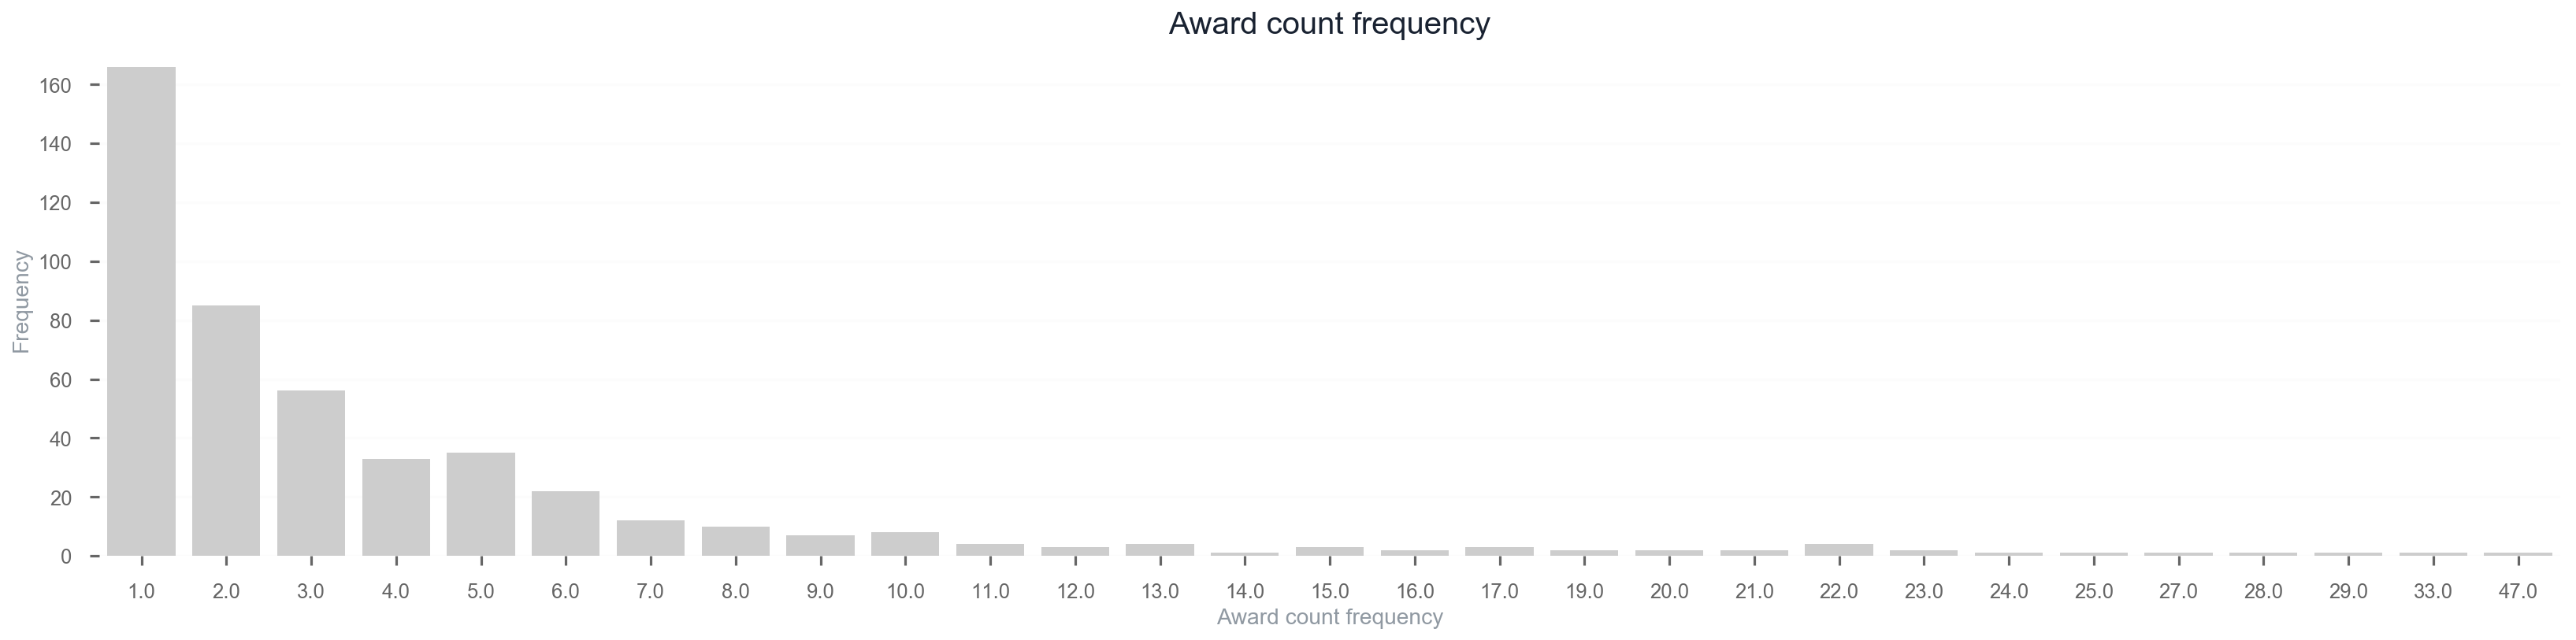

In [6]:
figures.count_bar(df['award_count'].dropna(),
            "Award count frequency",
            ax_size=(28, 6)
            )

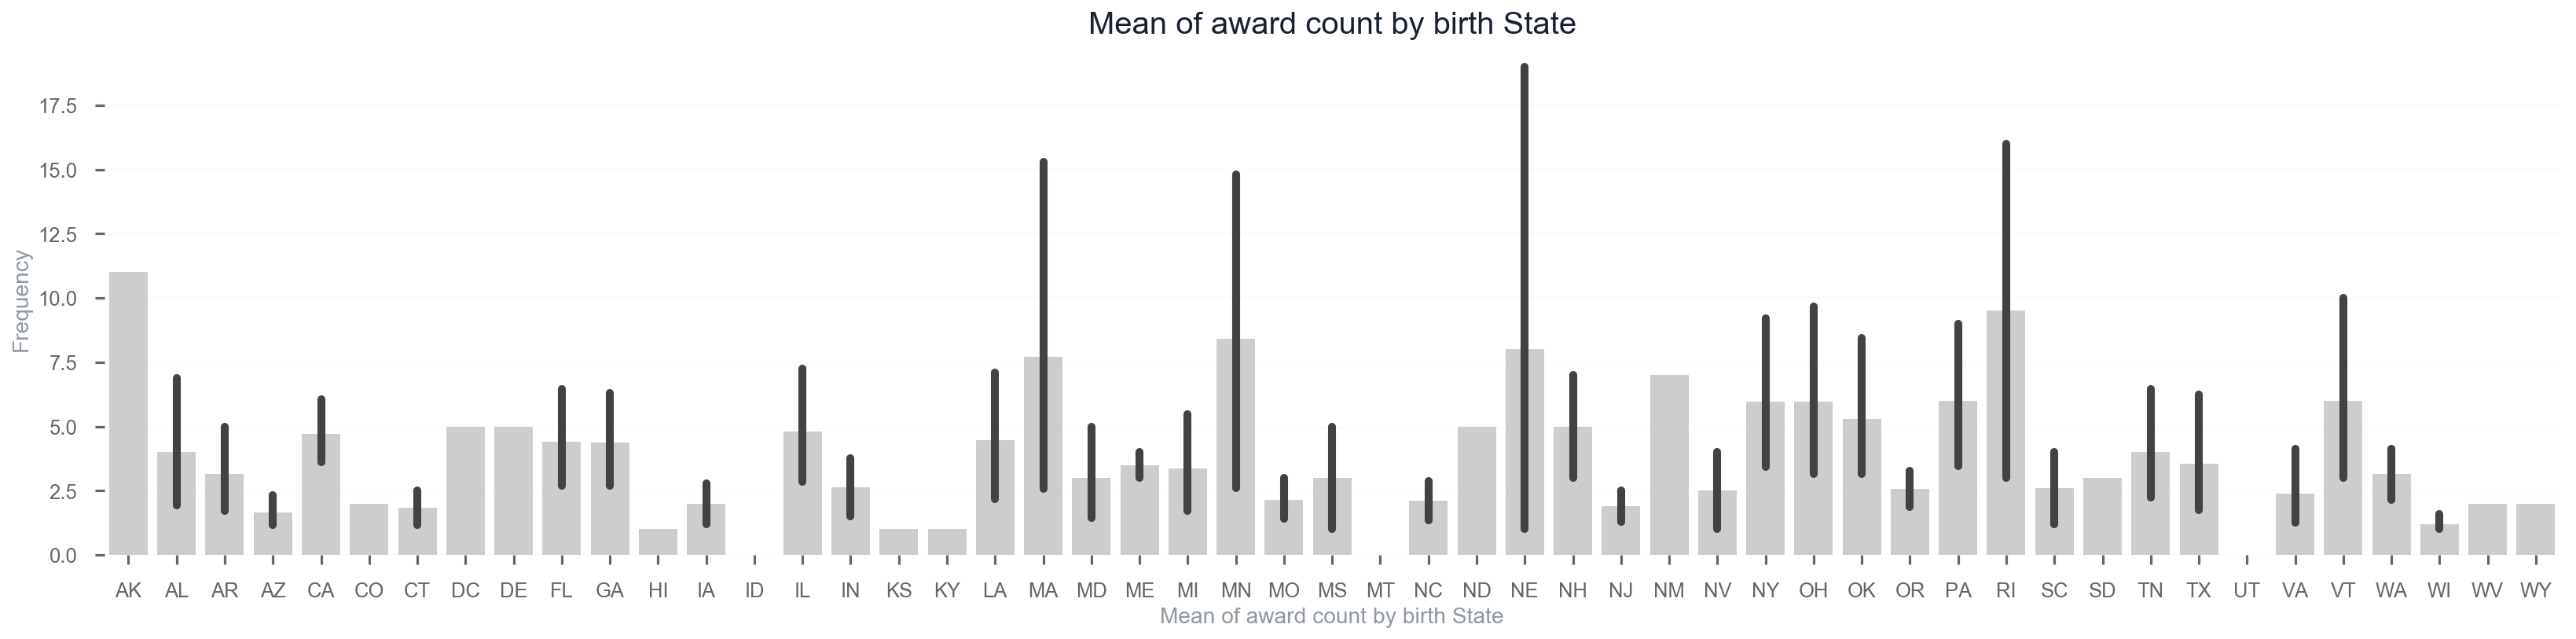

In [171]:
figures.bar(df['award_count'].dropna(),
            "Mean of award count by birth State", 
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

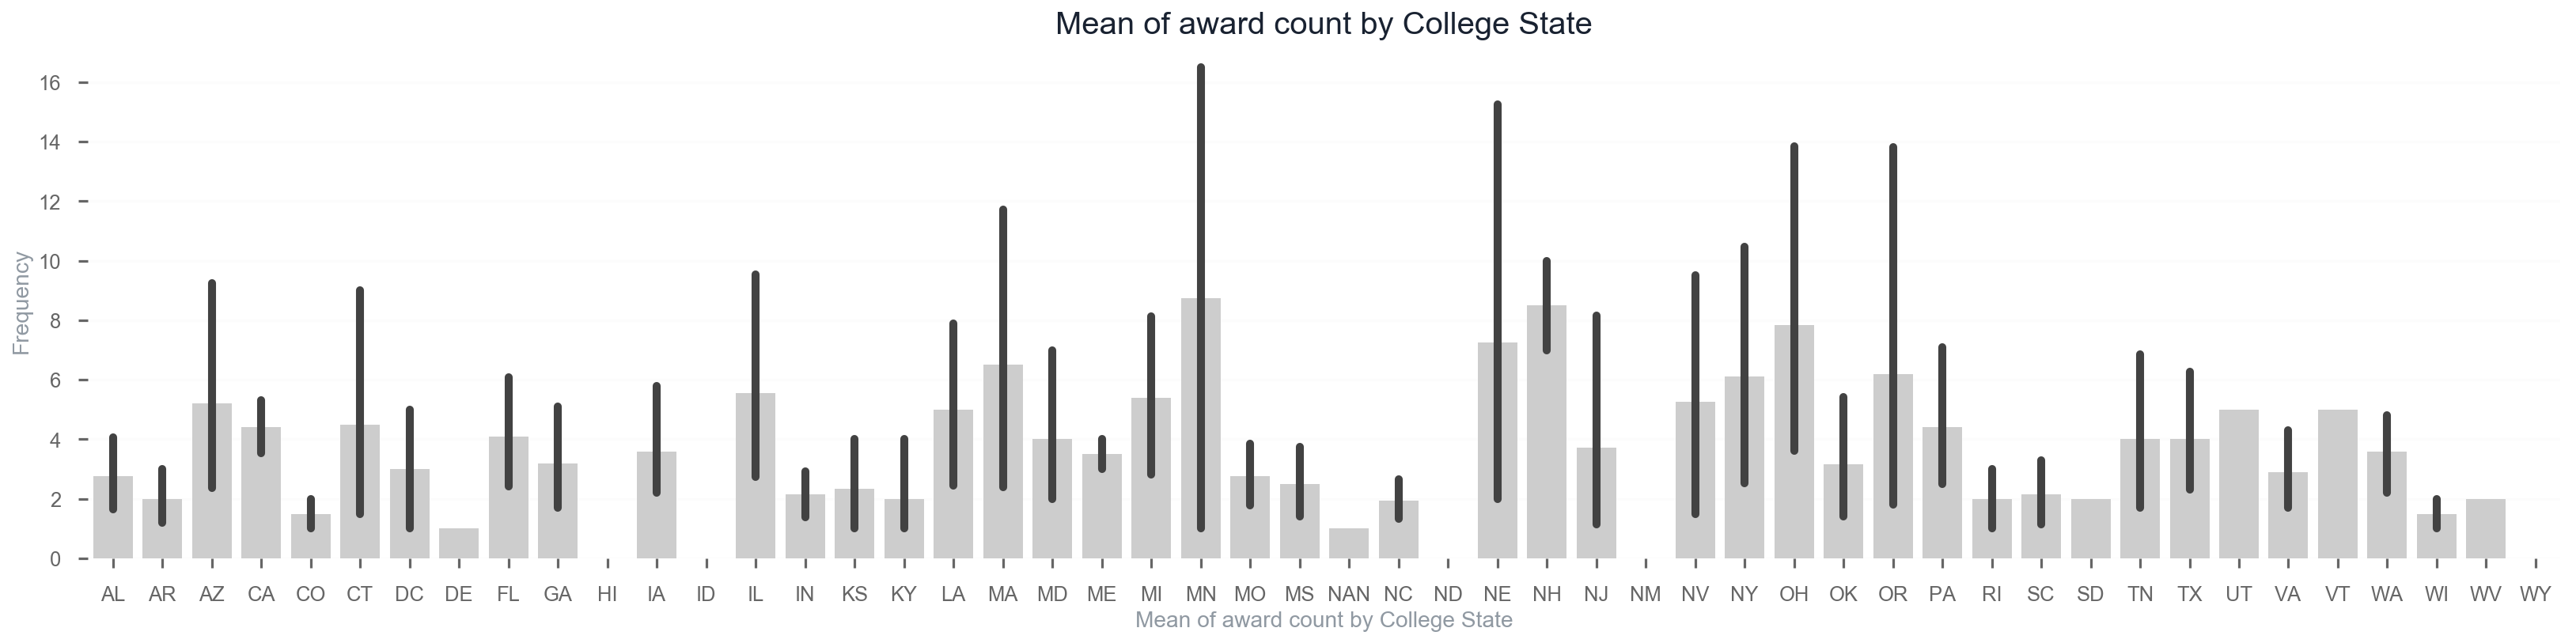

In [33]:
figures.bar(df['award_count'].dropna(),
            "Mean of award count by College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

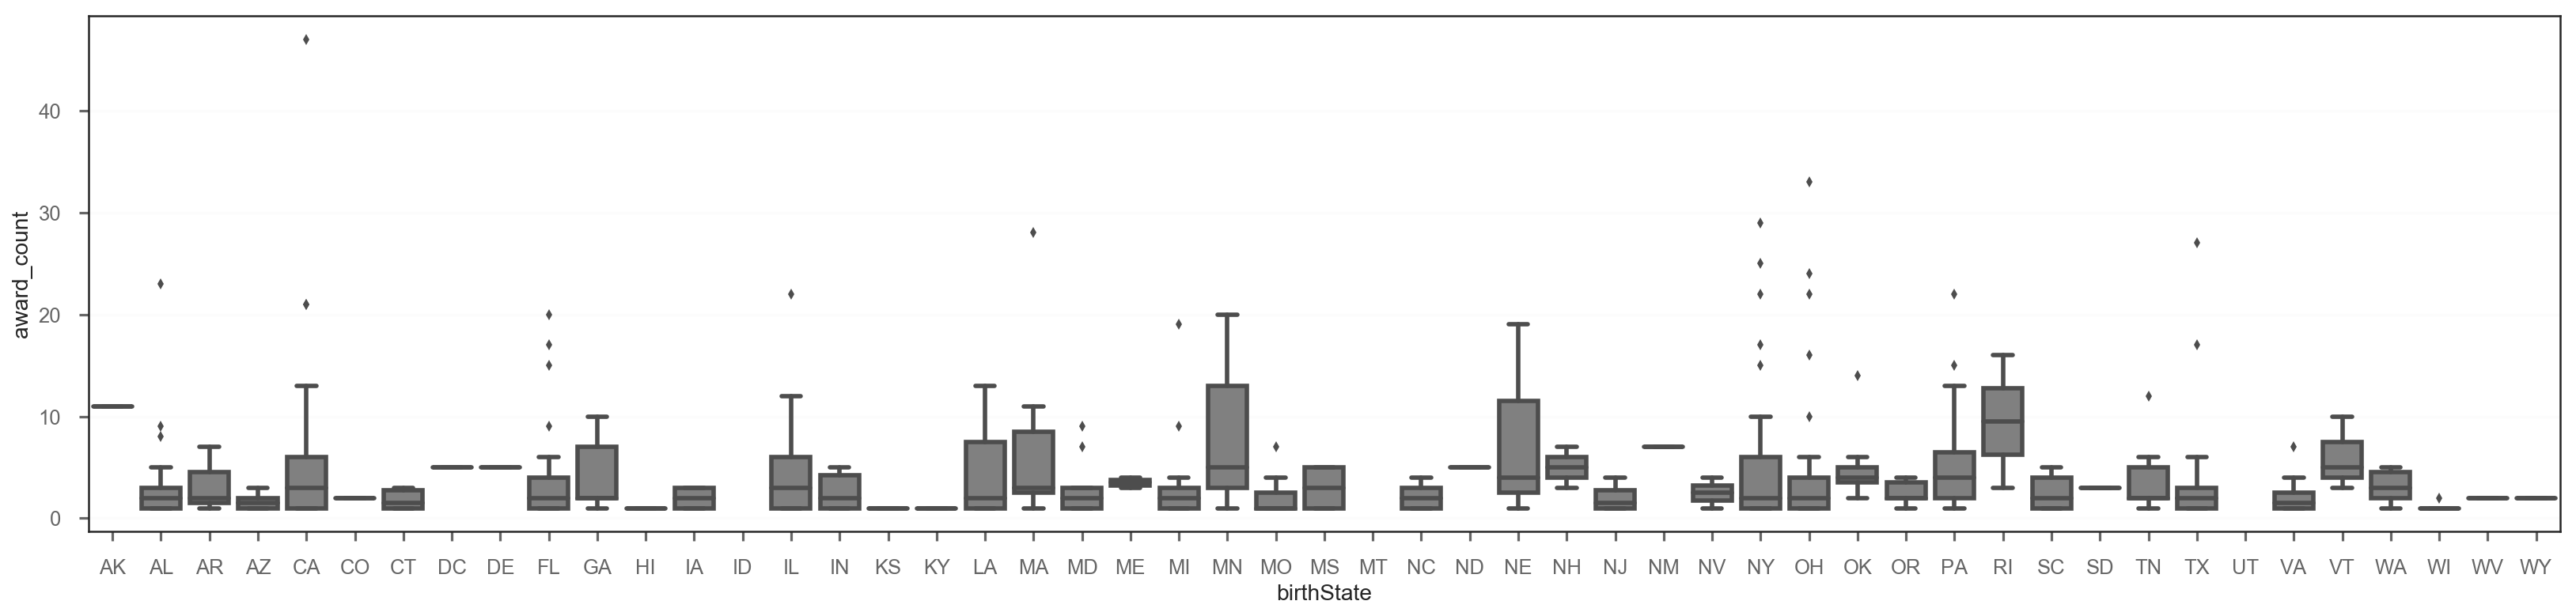

In [170]:
sns.boxplot(x= (df[df['birthCountry'] == 'USA'].sort_values(['birthState'])['birthState']), 
            y=df['award_count'].dropna(), data=df, color="grey")

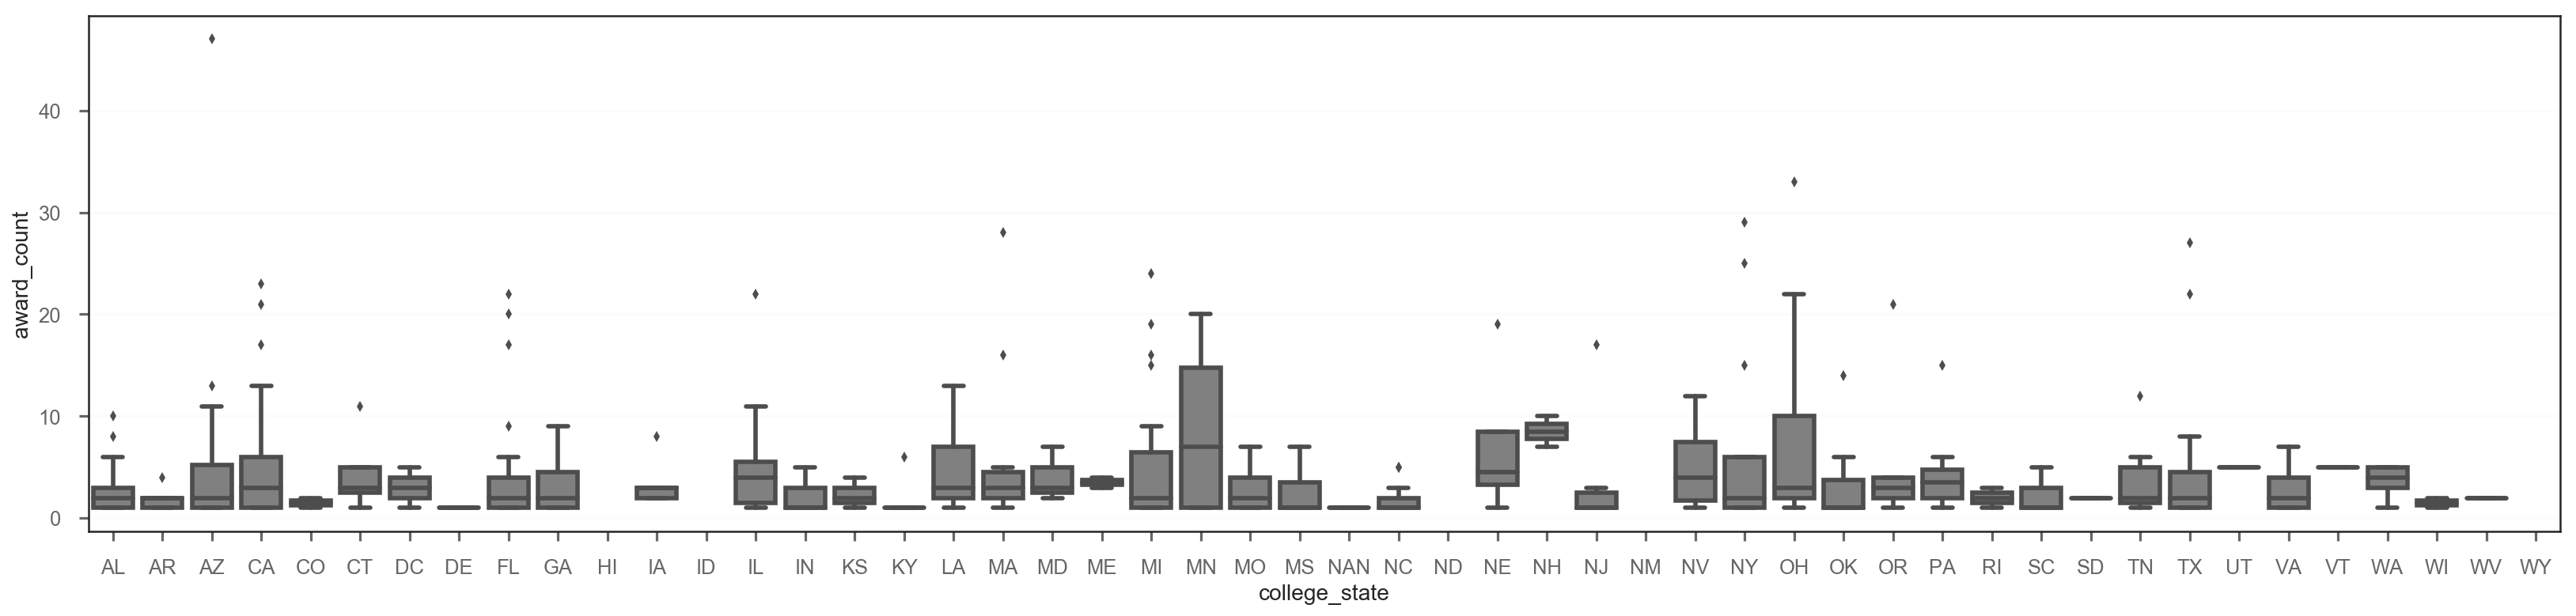

In [169]:
sns.boxplot(x= (df[df['birthCountry'] == 'USA'].sort_values(['college_state'])['college_state']), 
            y=df['award_count'].dropna(), data=df, color="grey")

## All star count

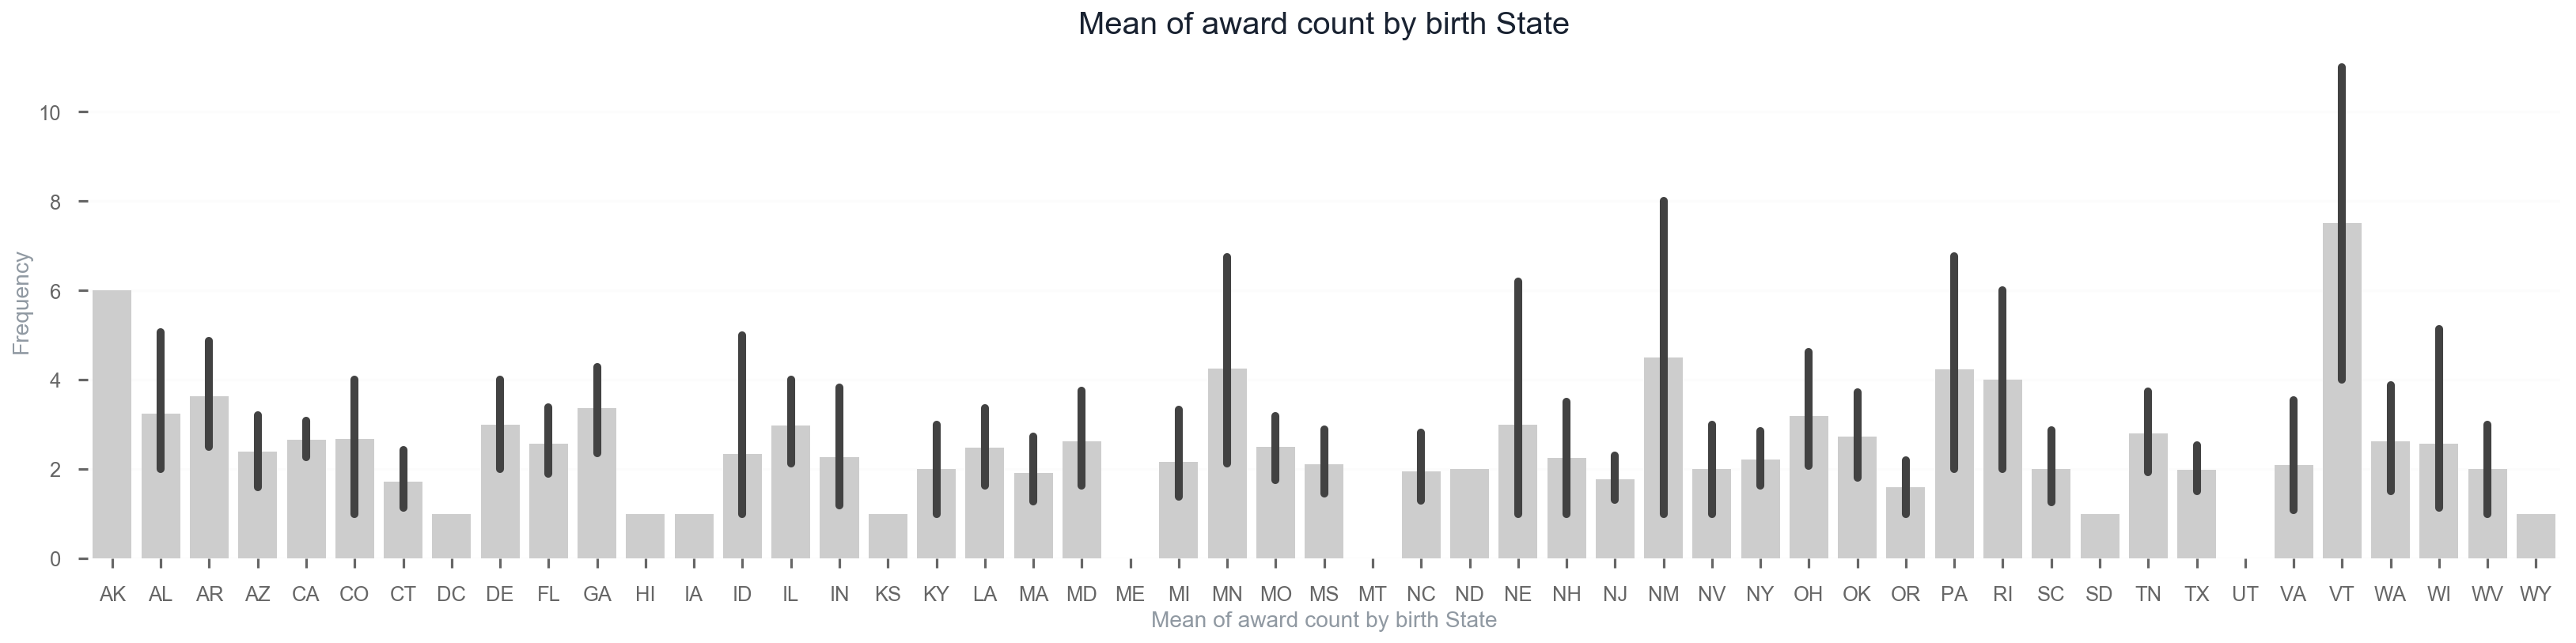

In [44]:
figures.bar(df['allstar_count'].dropna(),
            "Mean of award count by birth State", 
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

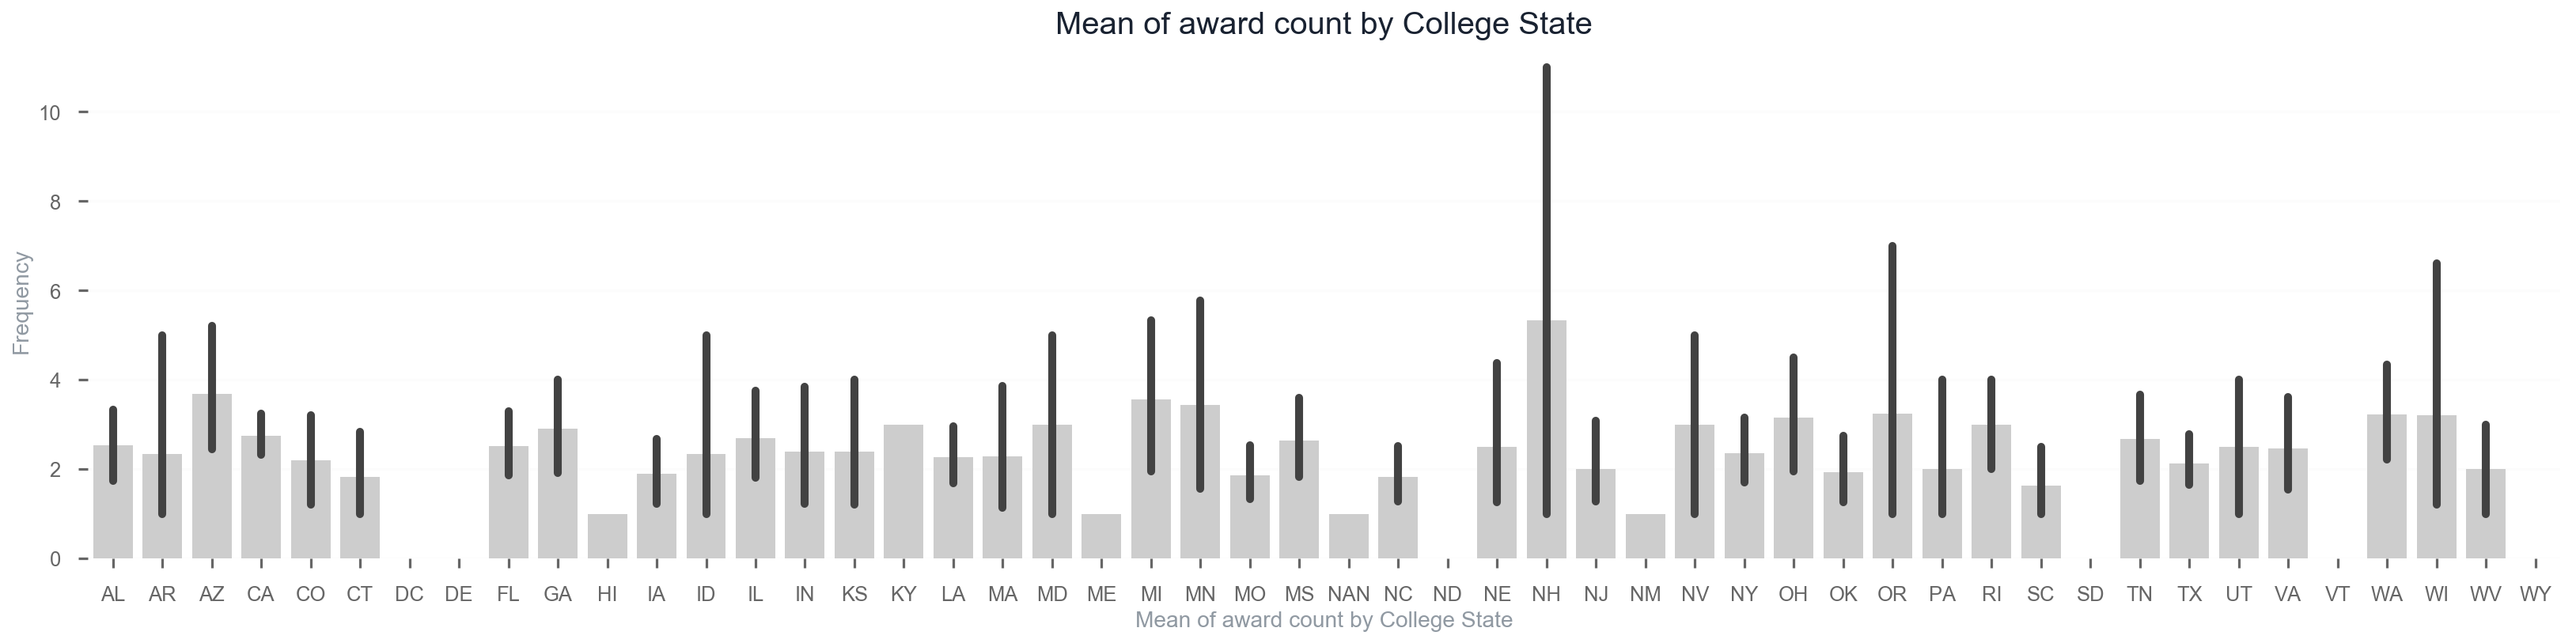

In [46]:
figures.bar(df['allstar_count'].dropna(),
            "Mean of award count by College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

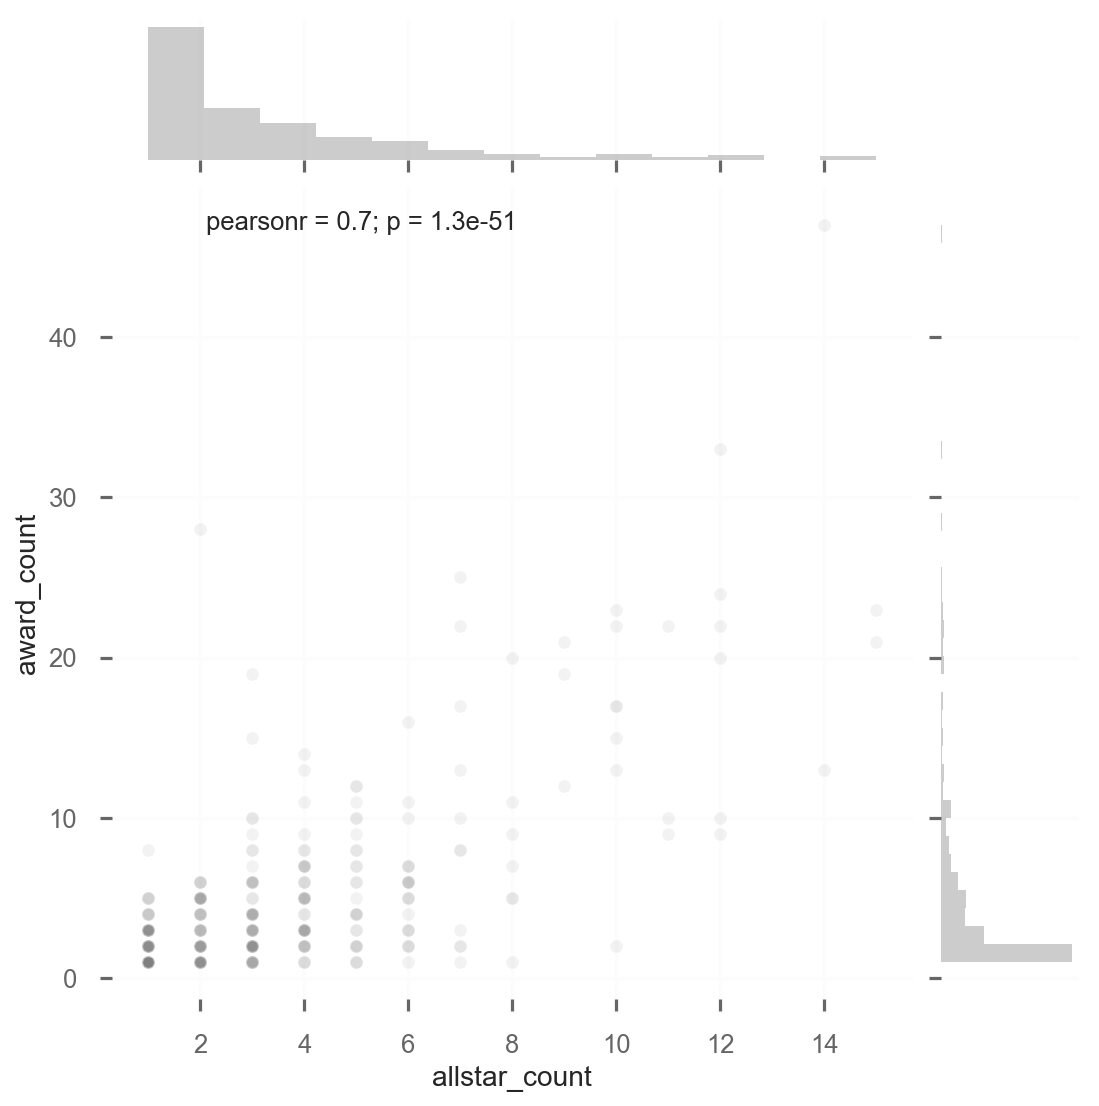

In [165]:
sns.jointplot(x='allstar_count', y='award_count', data=df[['award_count', 'allstar_count']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

### Height and weight

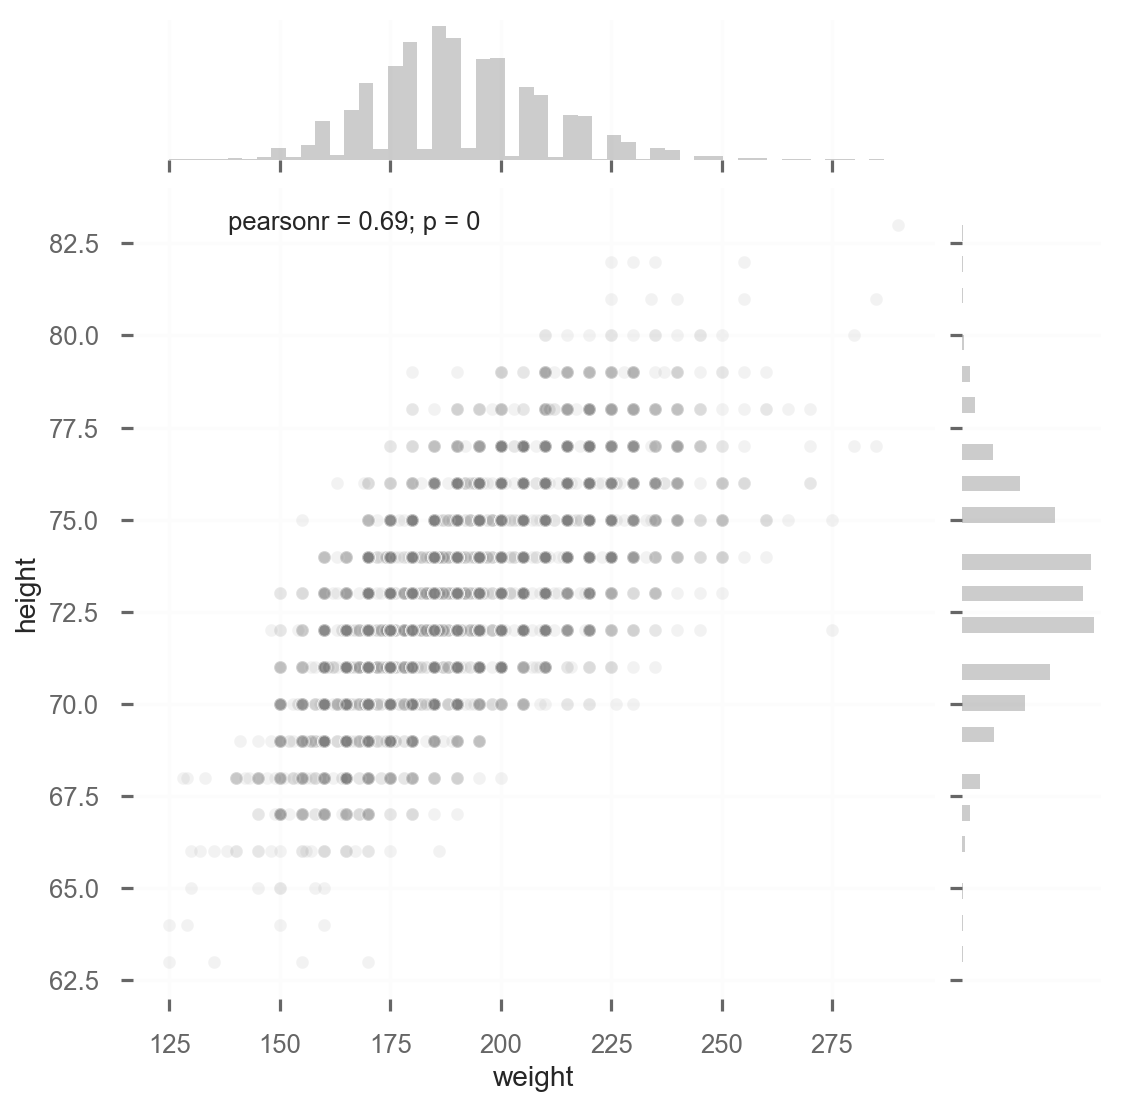

In [164]:
sns.jointplot(x='weight', y='height', data=df[['weight', 'height']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

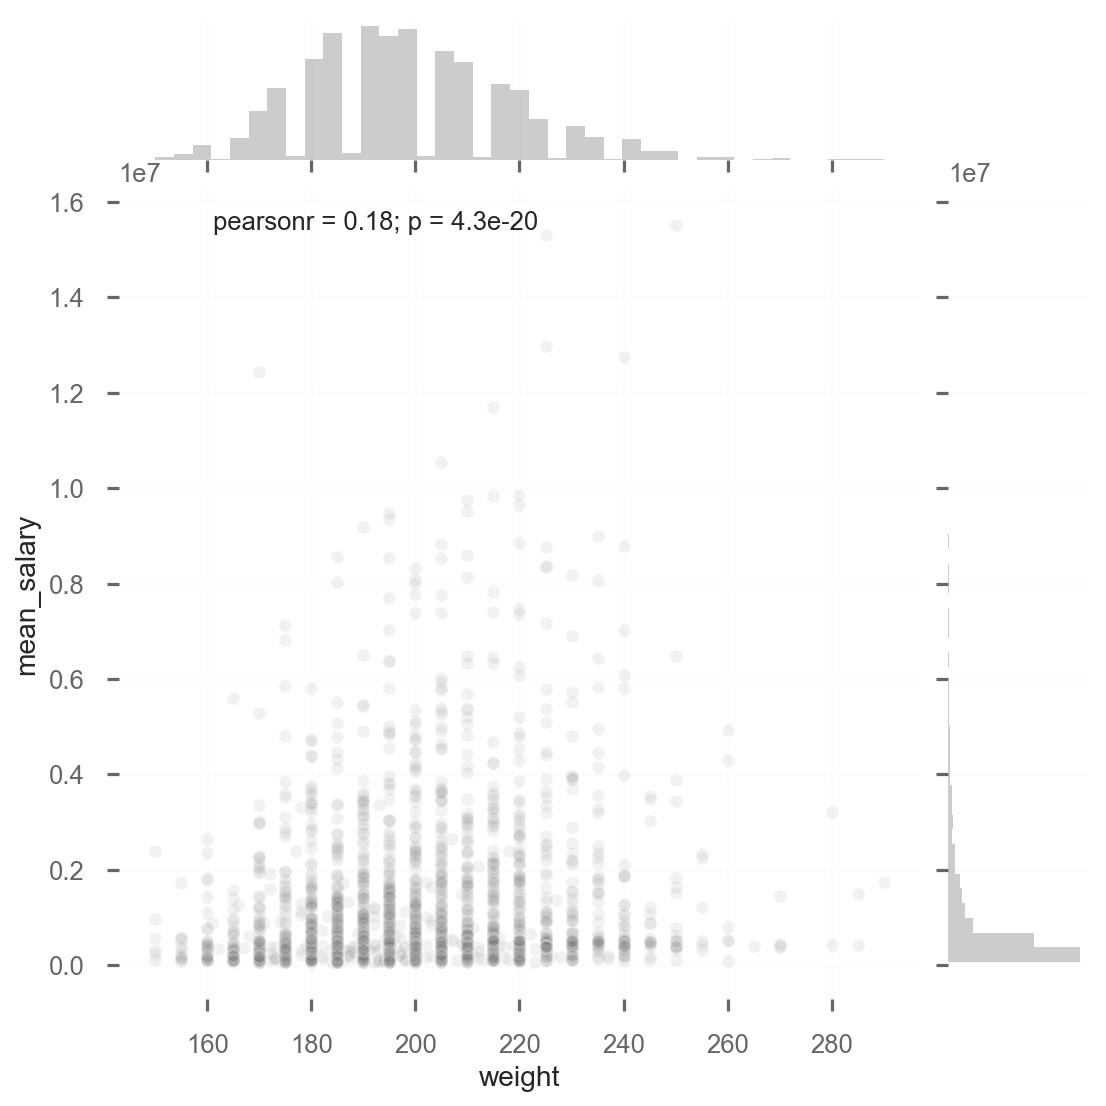

In [163]:
sns.jointplot(x='weight', y='mean_salary', data=df[['weight', 'mean_salary']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

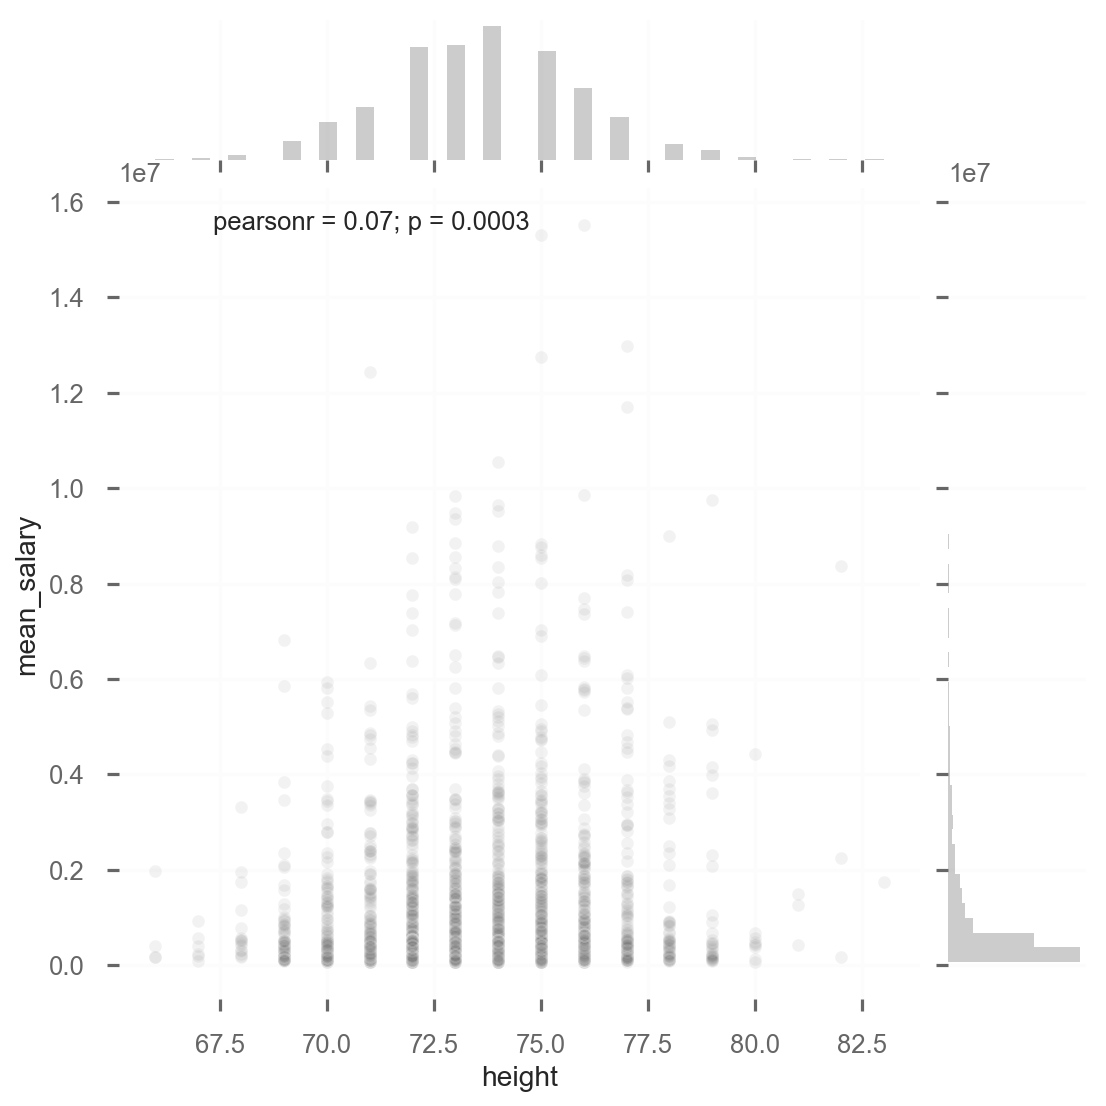

In [162]:
sns.jointplot(x='height', y='mean_salary', data=df[['height', 'mean_salary']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

#### Salary

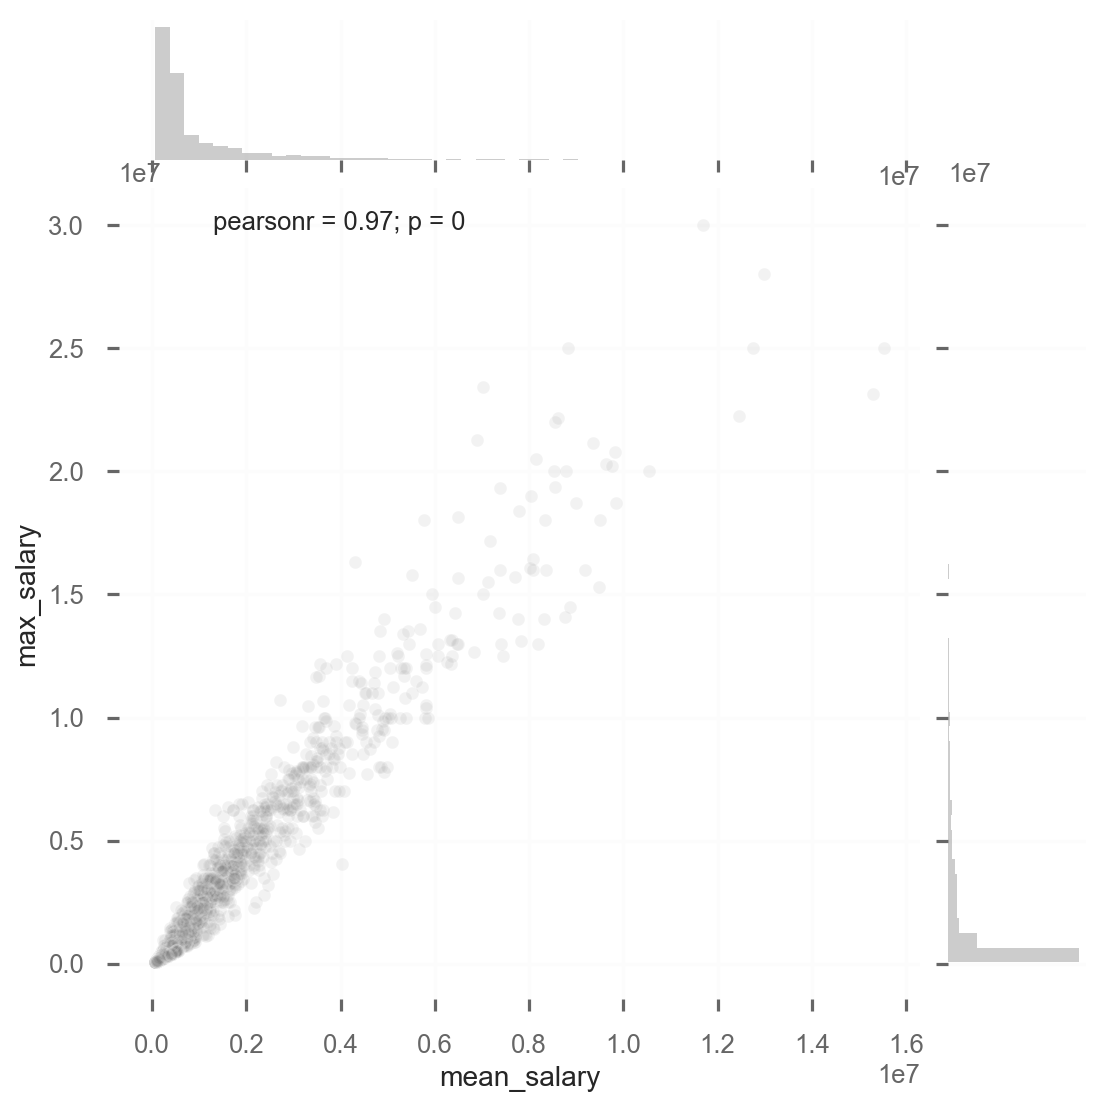

In [161]:
sns.jointplot(x='mean_salary', y='max_salary', data=df[['mean_salary', 'max_salary']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

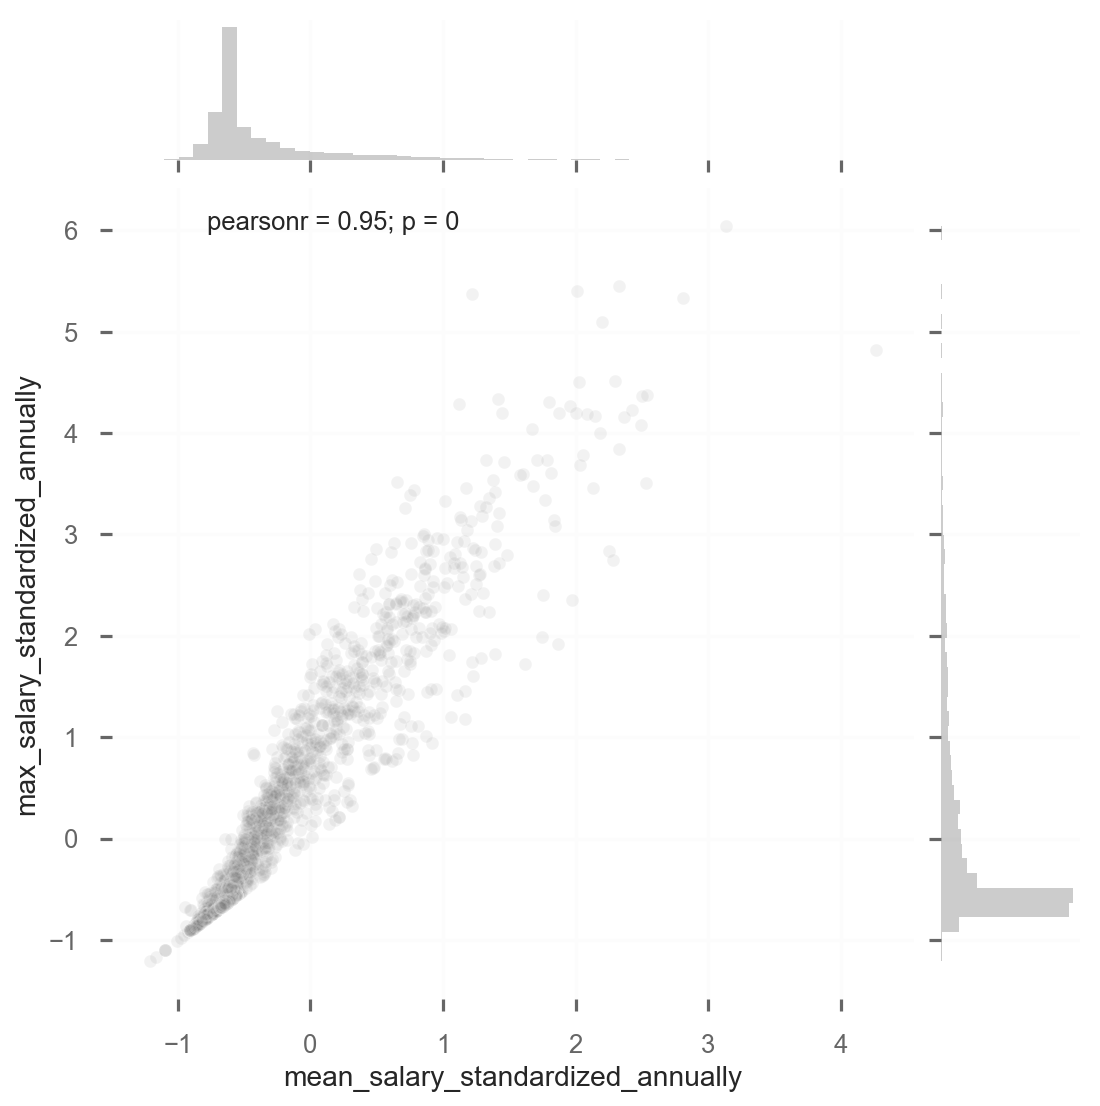

In [166]:
sns.jointplot(x='mean_salary_standardized_annually', y='max_salary_standardized_annually', data=df[['mean_salary_standardized_annually', 'max_salary_standardized_annually']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

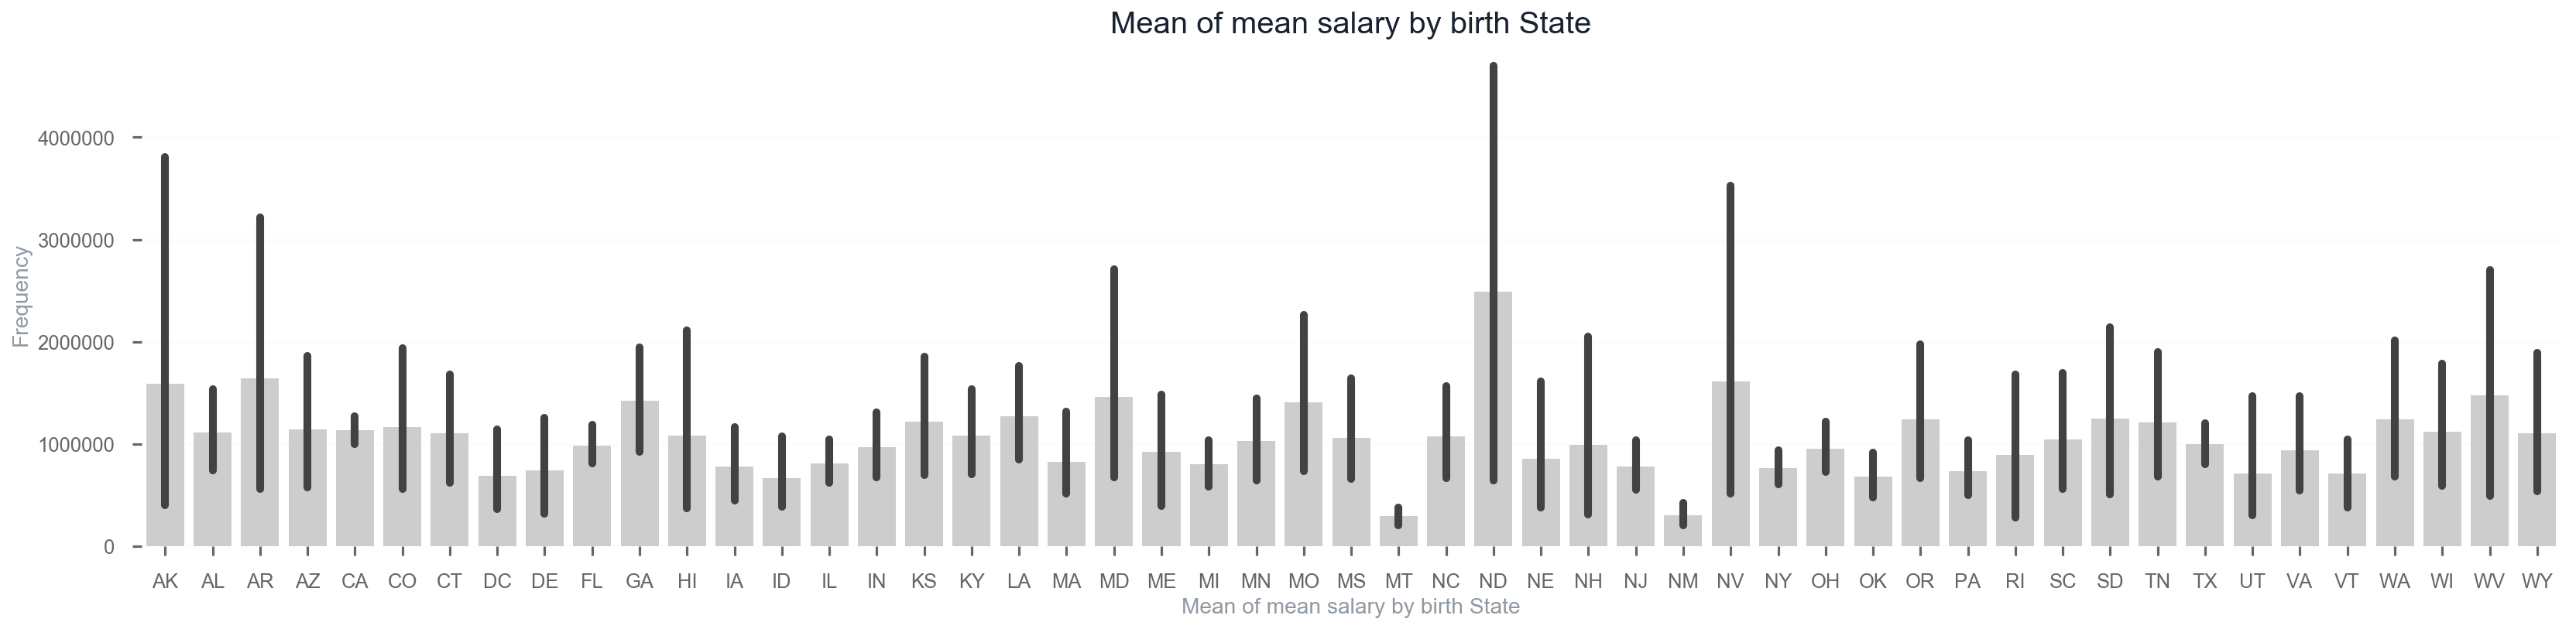

In [34]:
figures.bar(df['mean_salary'].dropna(),
            "Mean of mean salary by birth State",
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

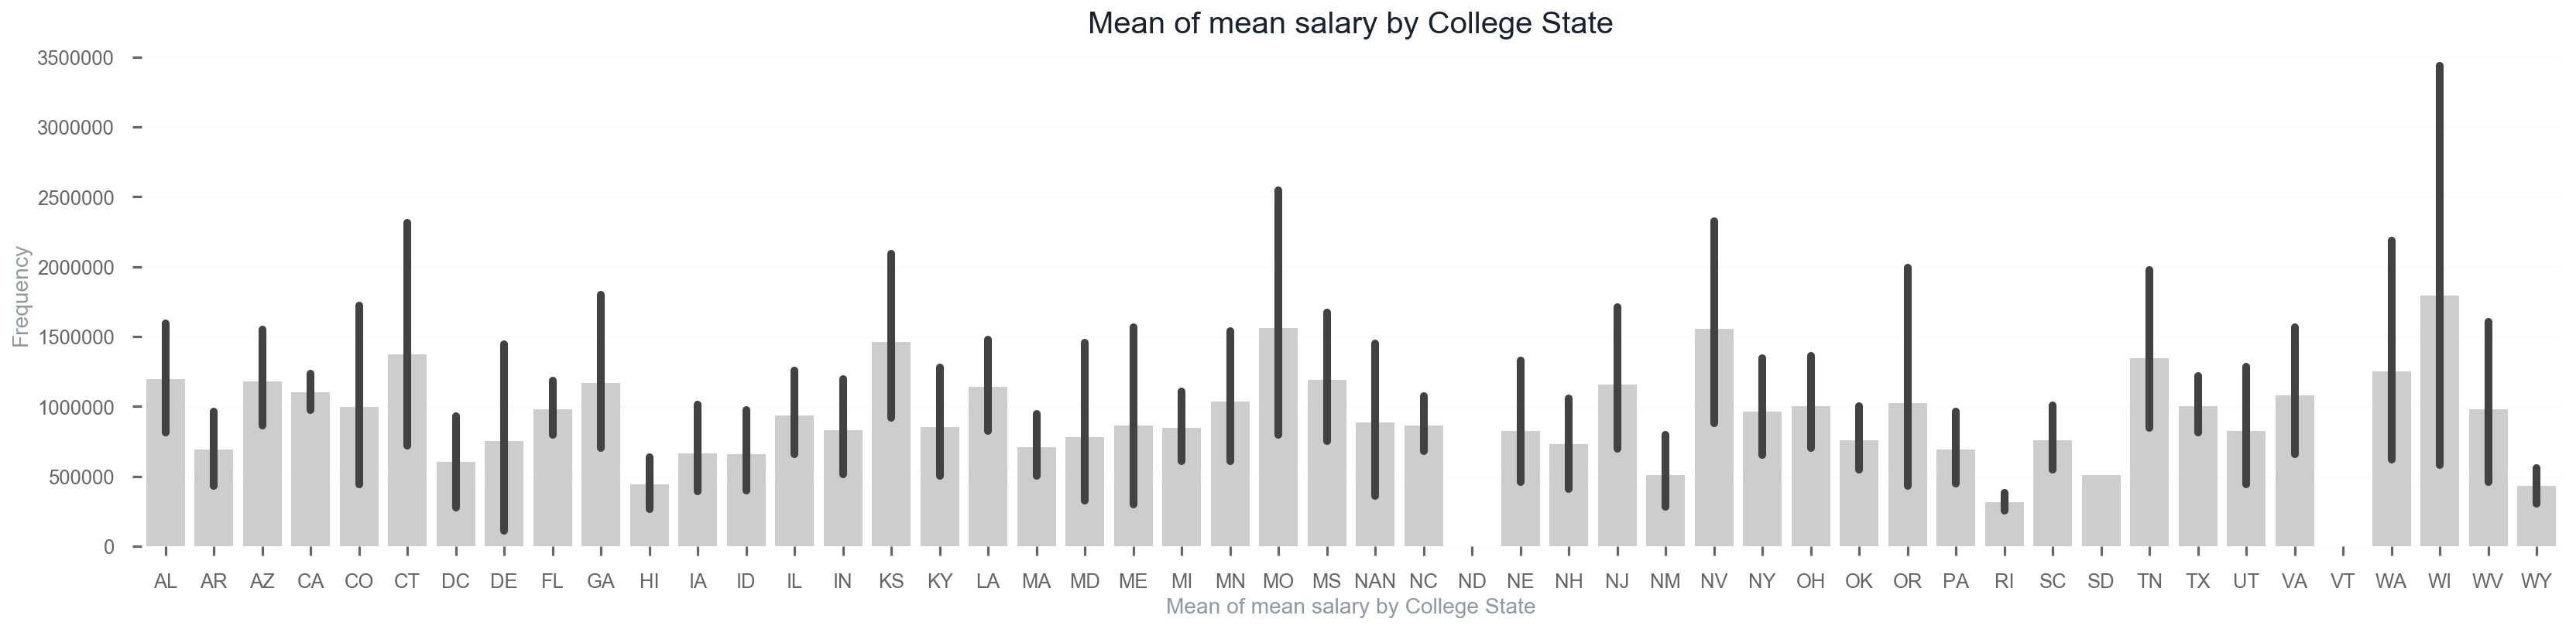

In [35]:
figures.bar(df['mean_salary'].dropna(),
            "Mean of mean salary by College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

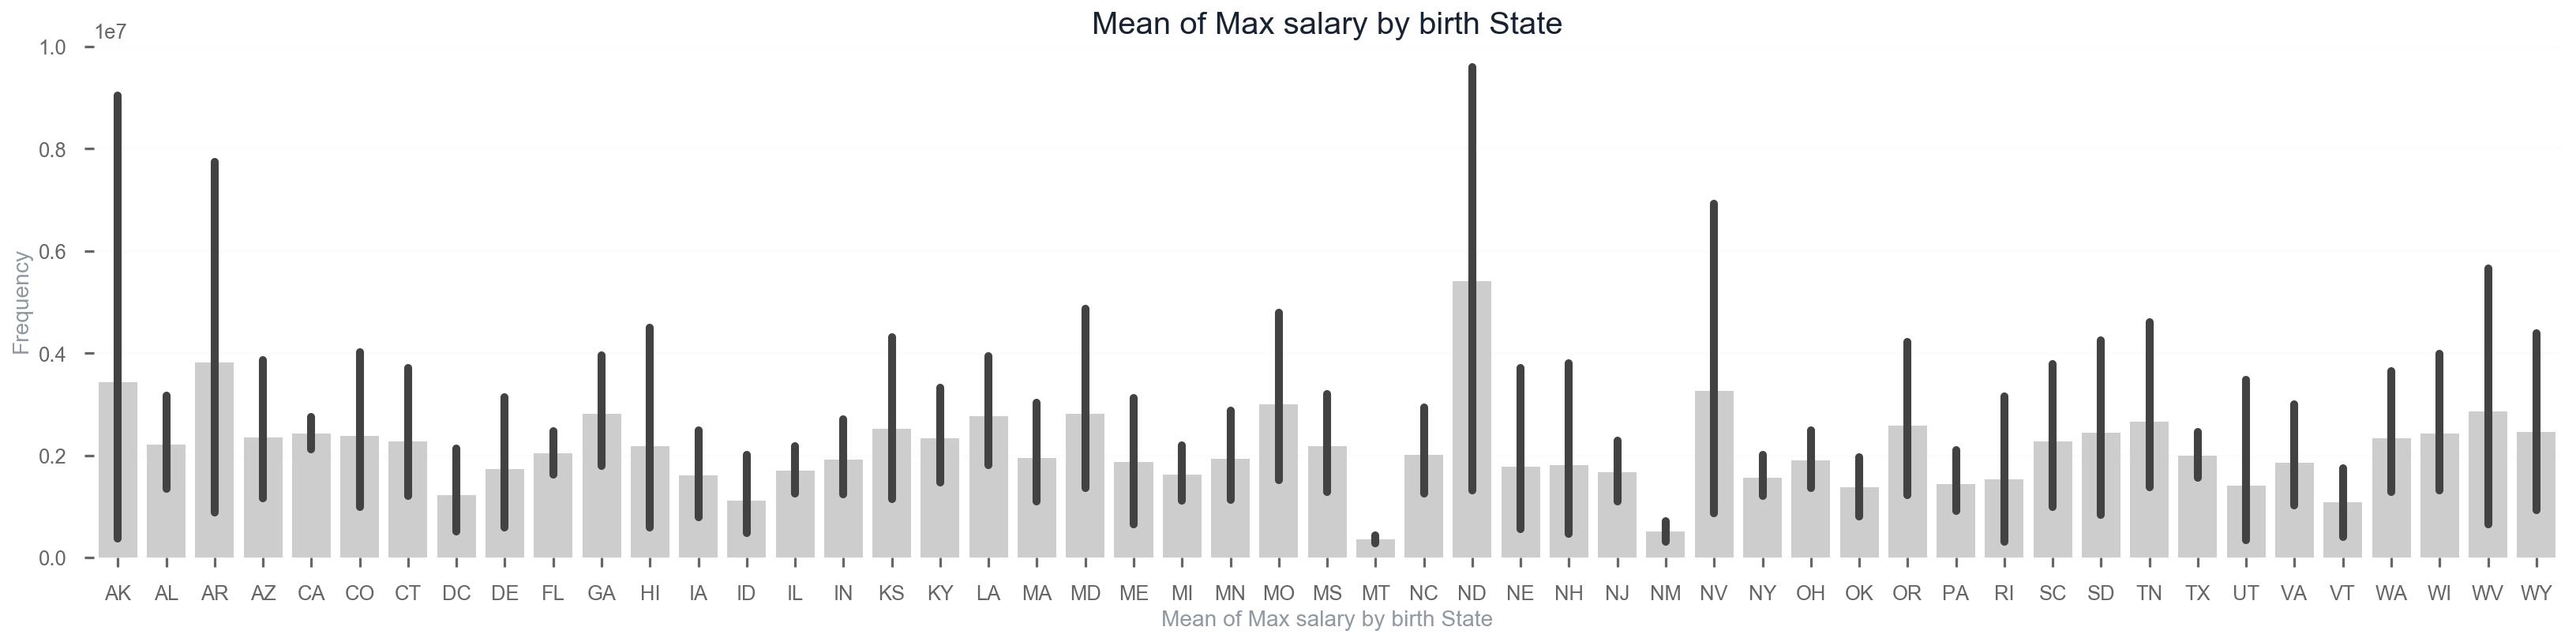

In [36]:
figures.bar(df['max_salary'].dropna(),
            "Mean of Max salary by birth State", 
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

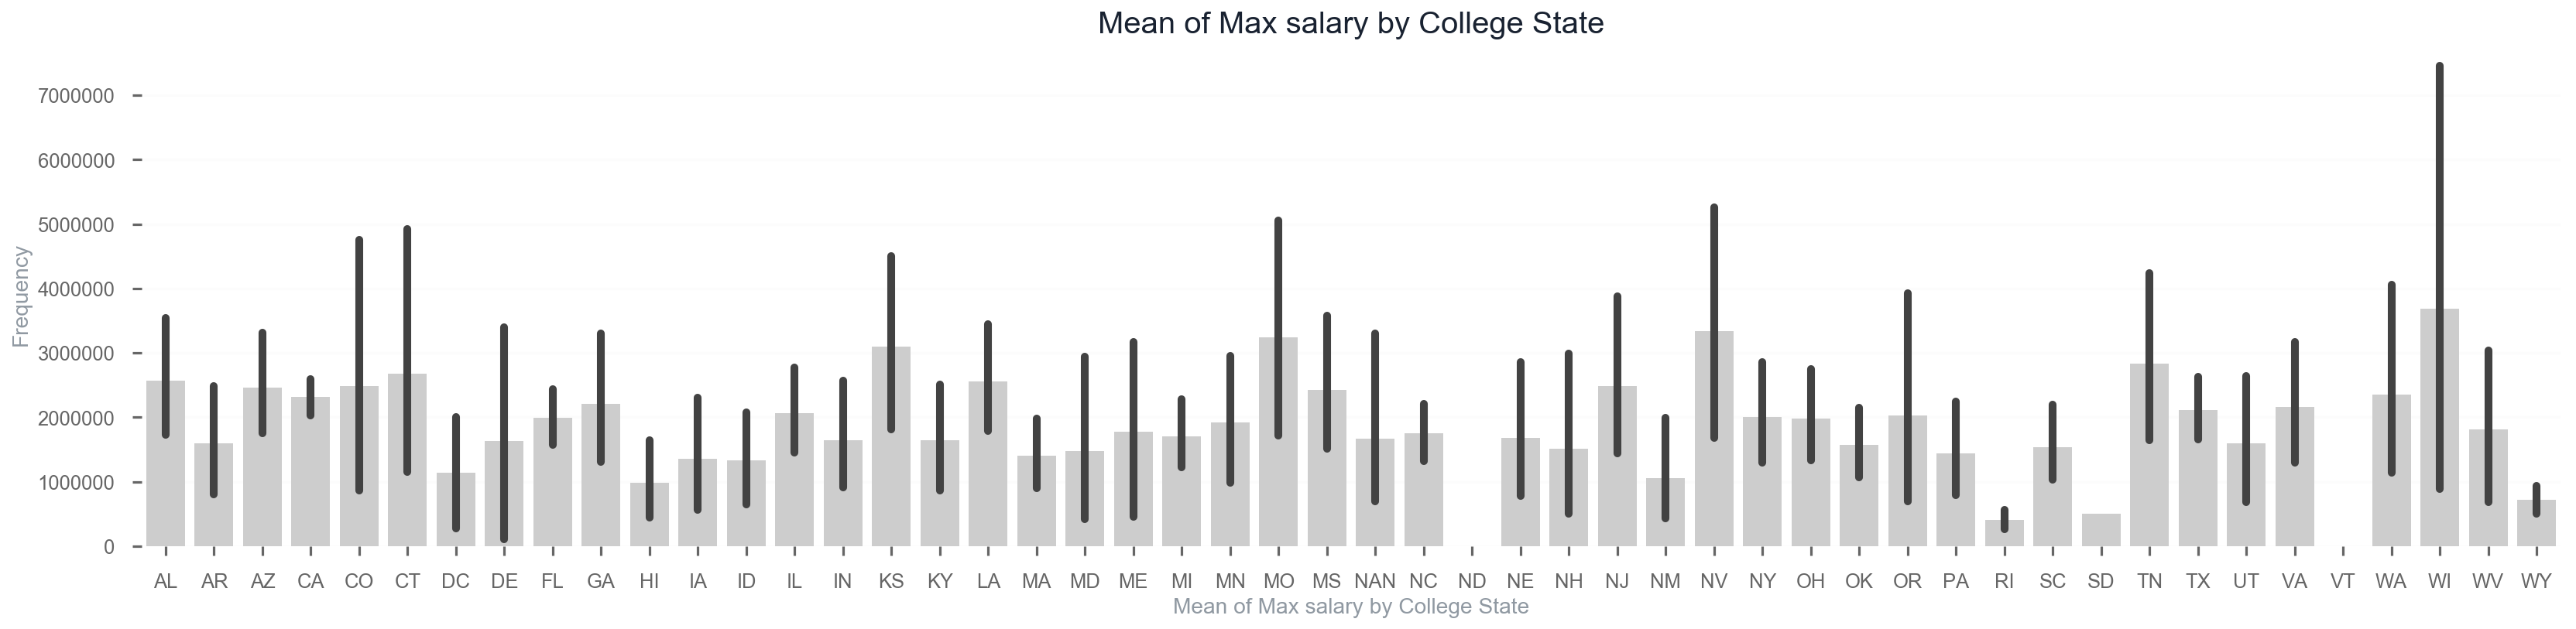

In [37]:
figures.bar(df['max_salary'].dropna(),
            "Mean of Max salary by College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

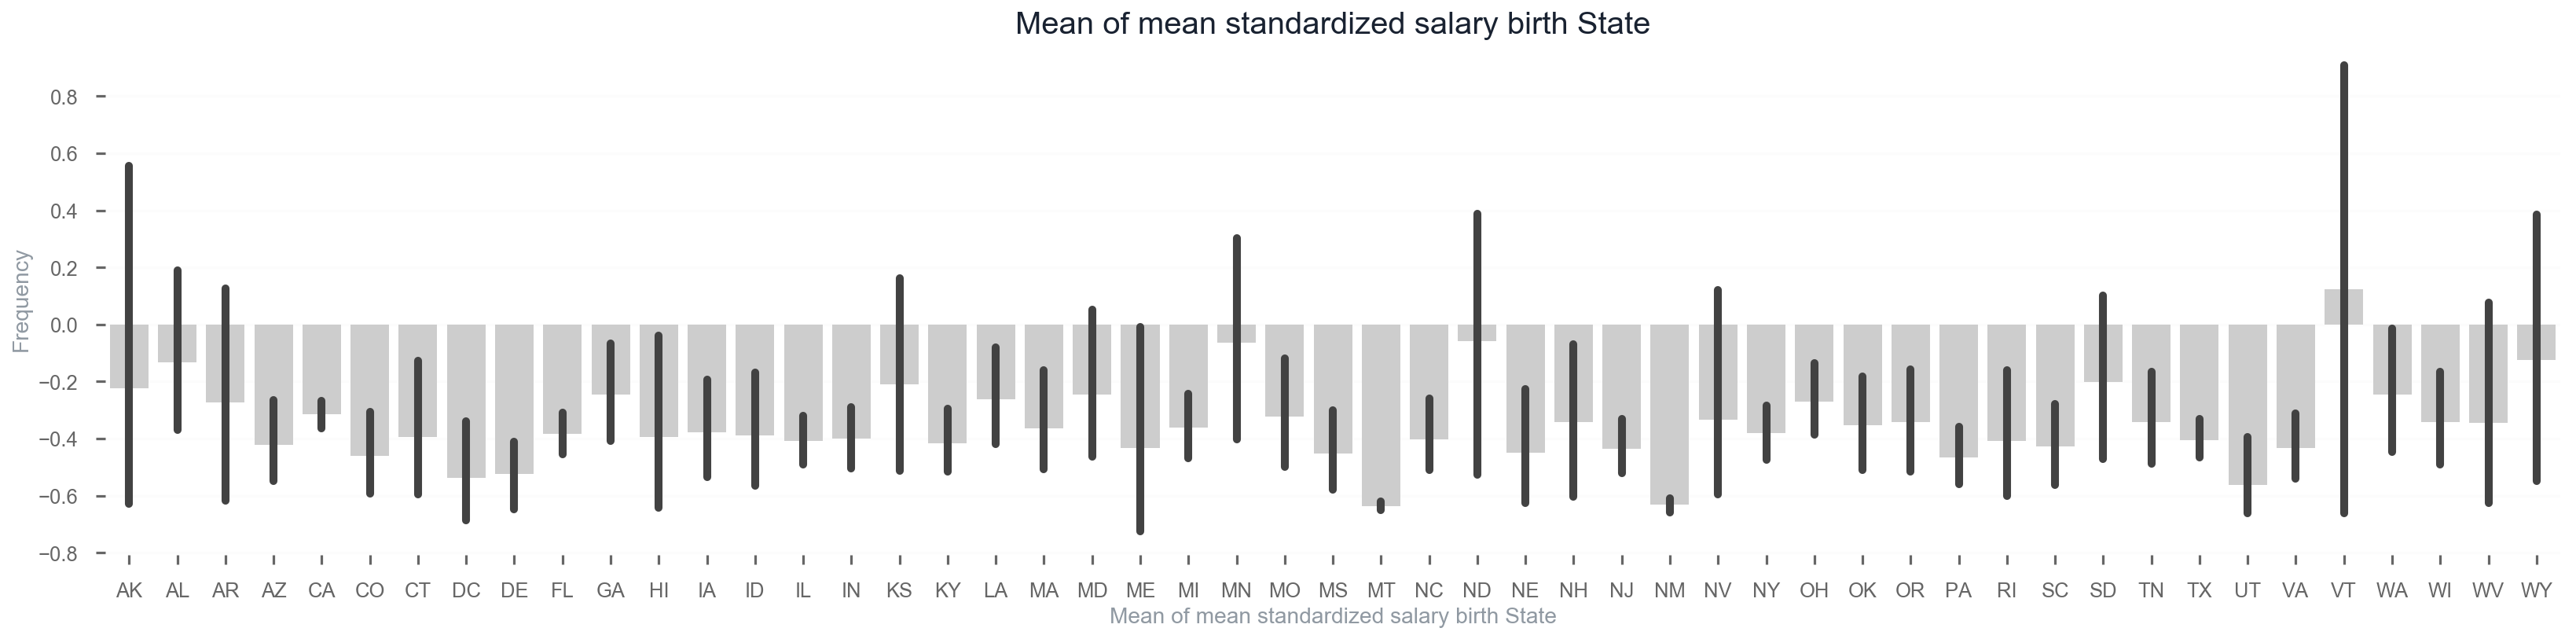

In [38]:
figures.bar(df['mean_salary_standardized_annually'].dropna(),
            "Mean of mean standardized salary birth State", 
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

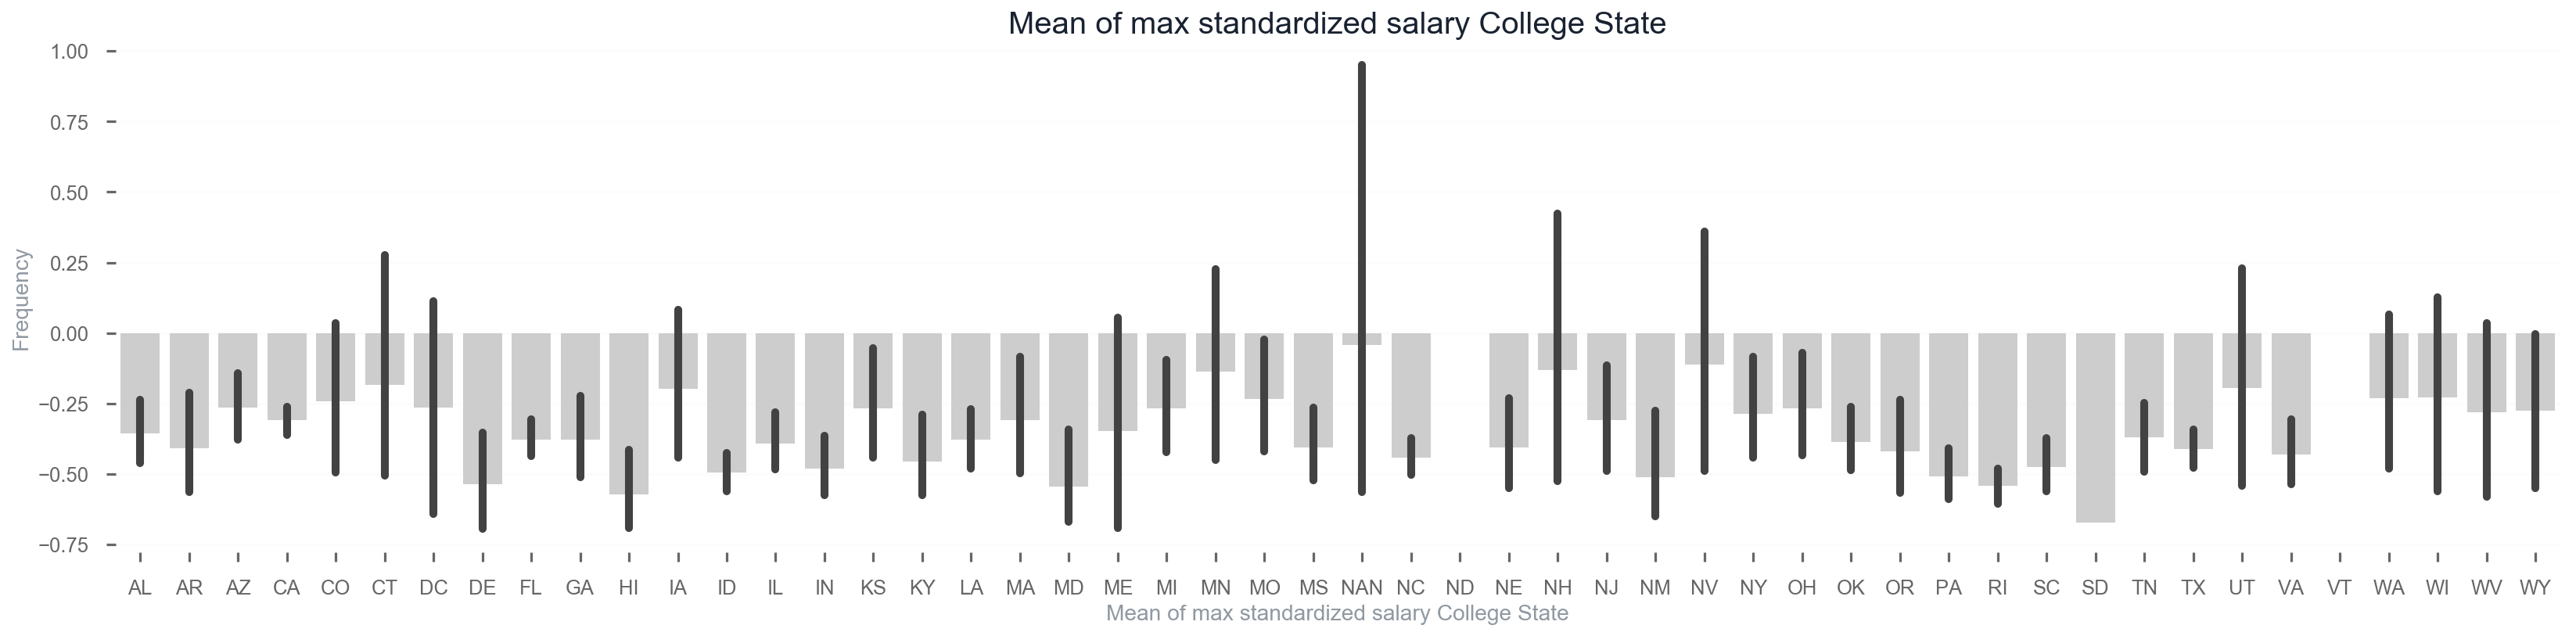

In [39]:
figures.bar(df['mean_salary_standardized_annually'].dropna(),
            "Mean of mean standardized salary College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

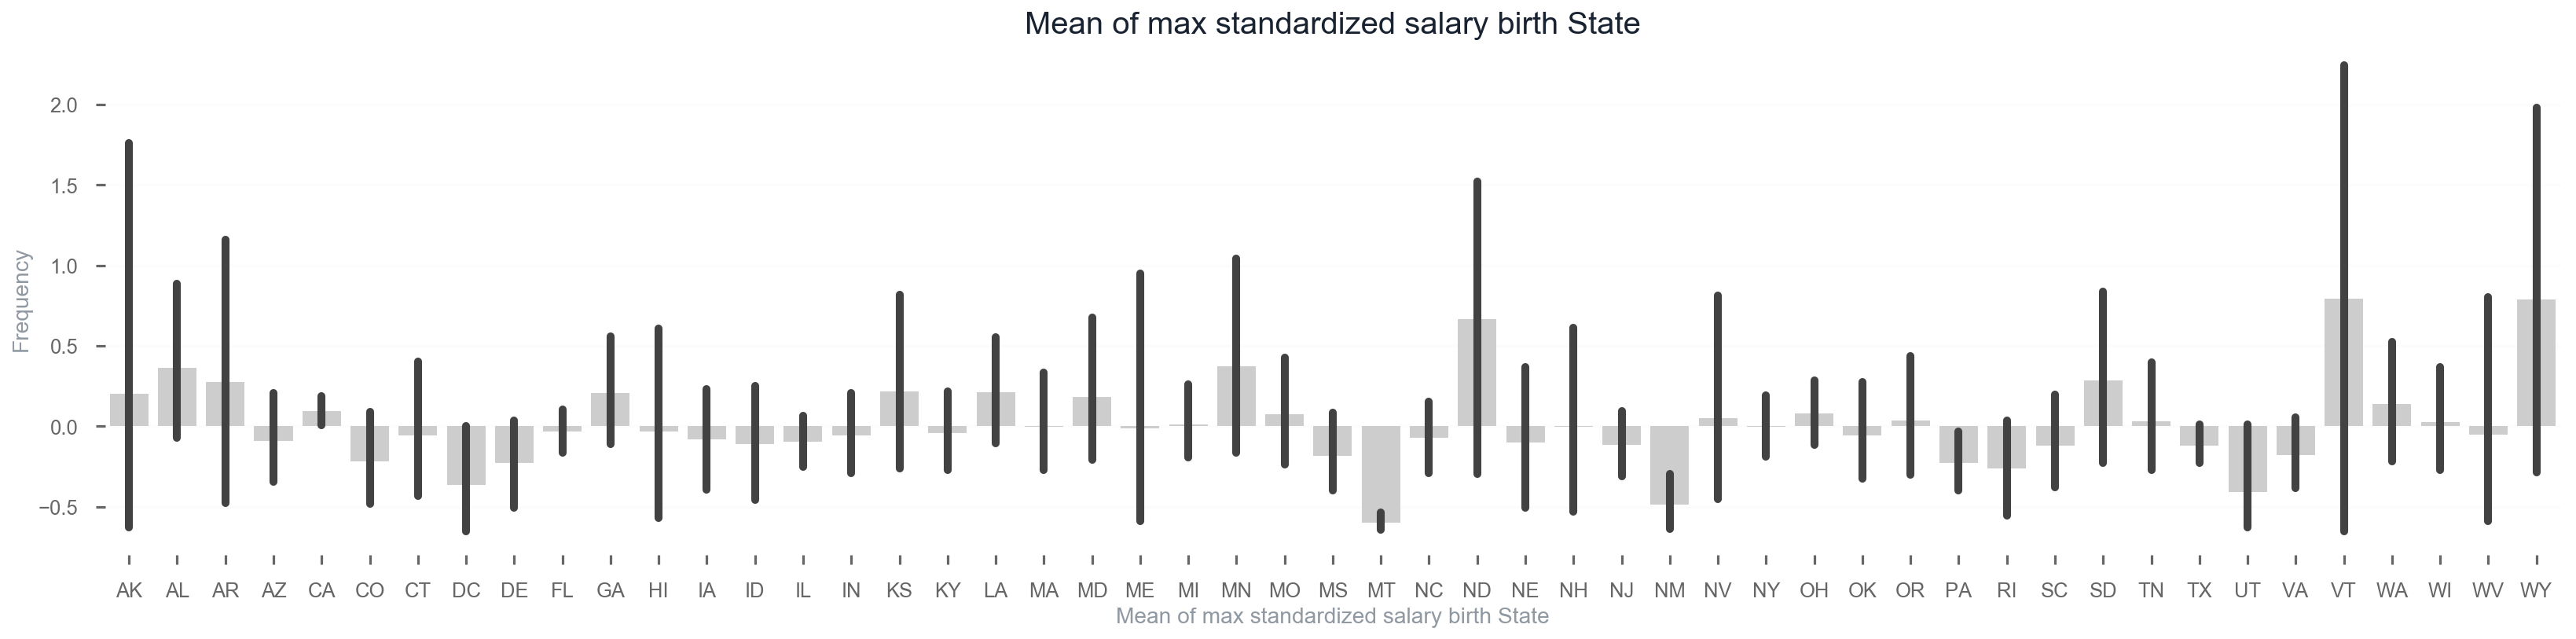

In [43]:
figures.bar(df['max_salary_standardized_annually'].dropna(),
            "Mean of max standardized salary birth State", 
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

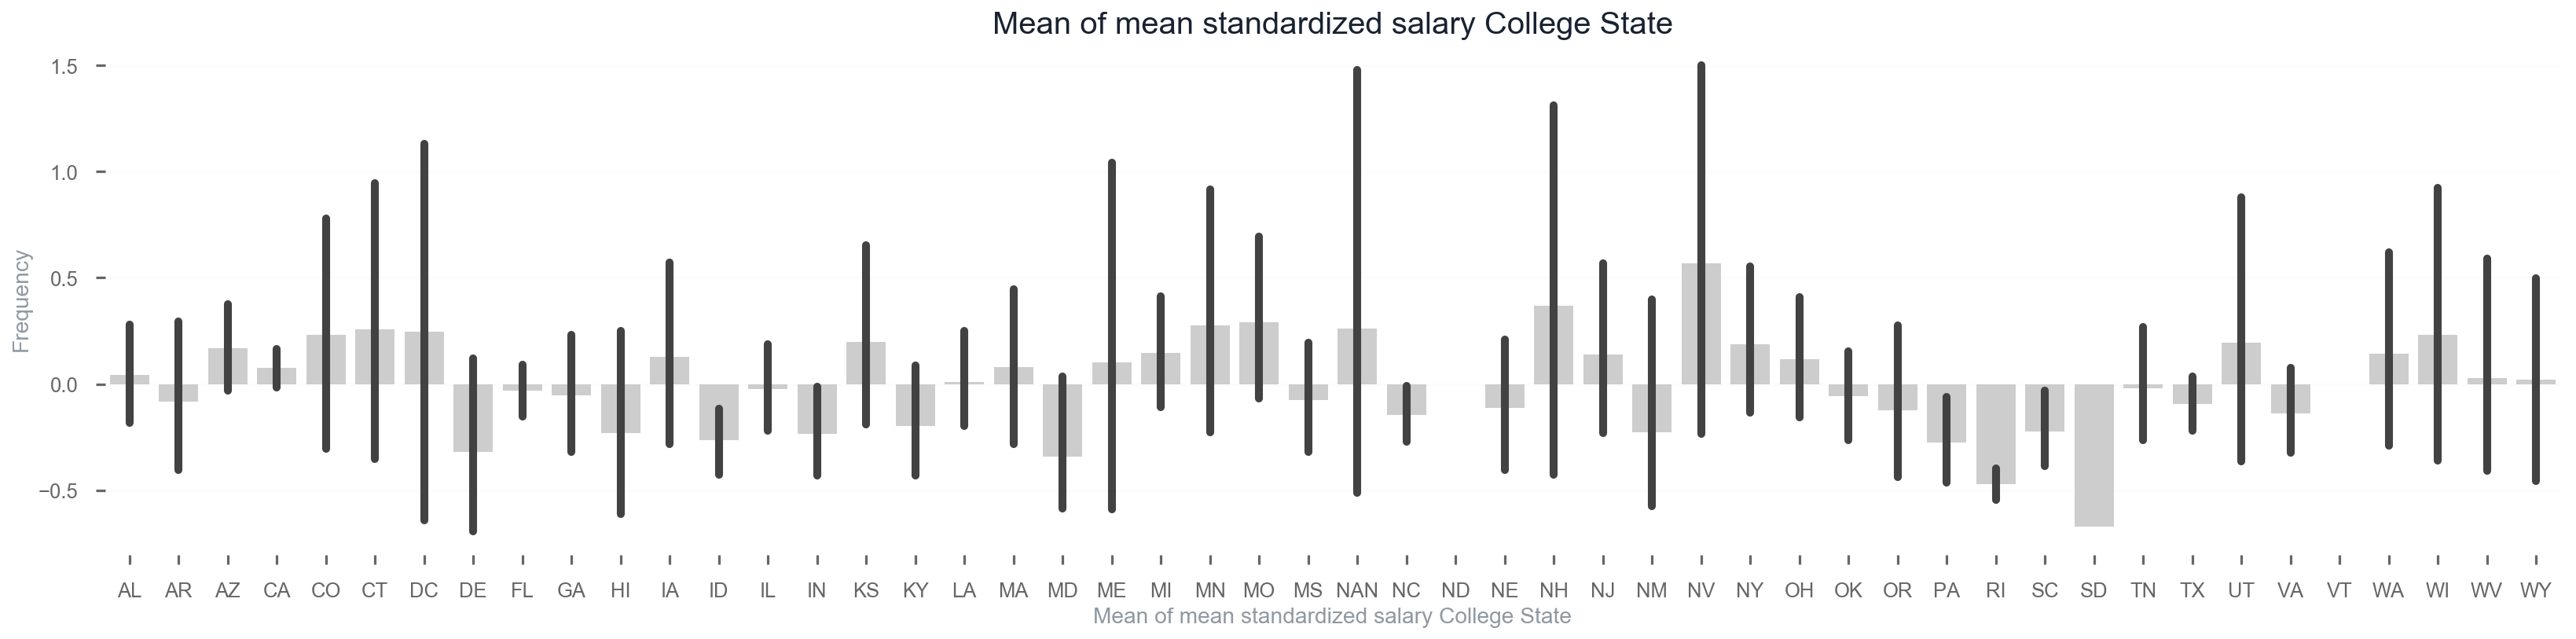

In [41]:
figures.bar(df['max_salary_standardized_annually'].dropna(),
            "Mean of mean standardized salary College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

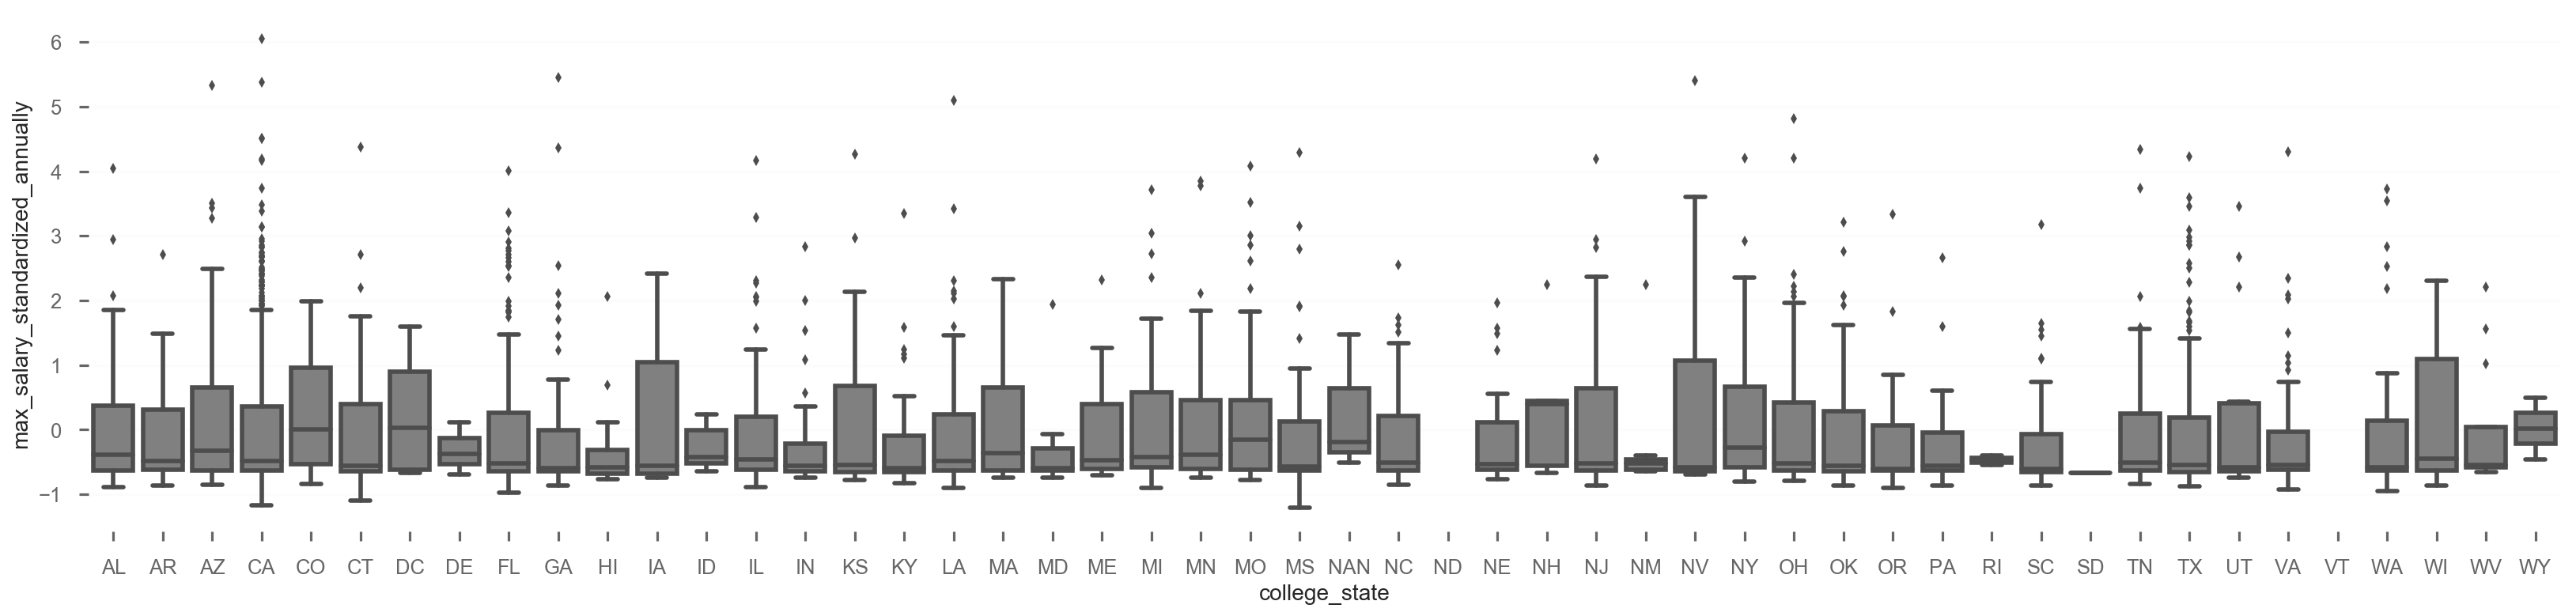

In [173]:
sns.boxplot(x= (df[df['birthCountry'] == 'USA'].sort_values(['college_state'])['college_state']), 
            y=df['max_salary_standardized_annually'].dropna(), data=df, color="grey")
sns.despine(offset=2, trim=True, left=True, bottom=True)

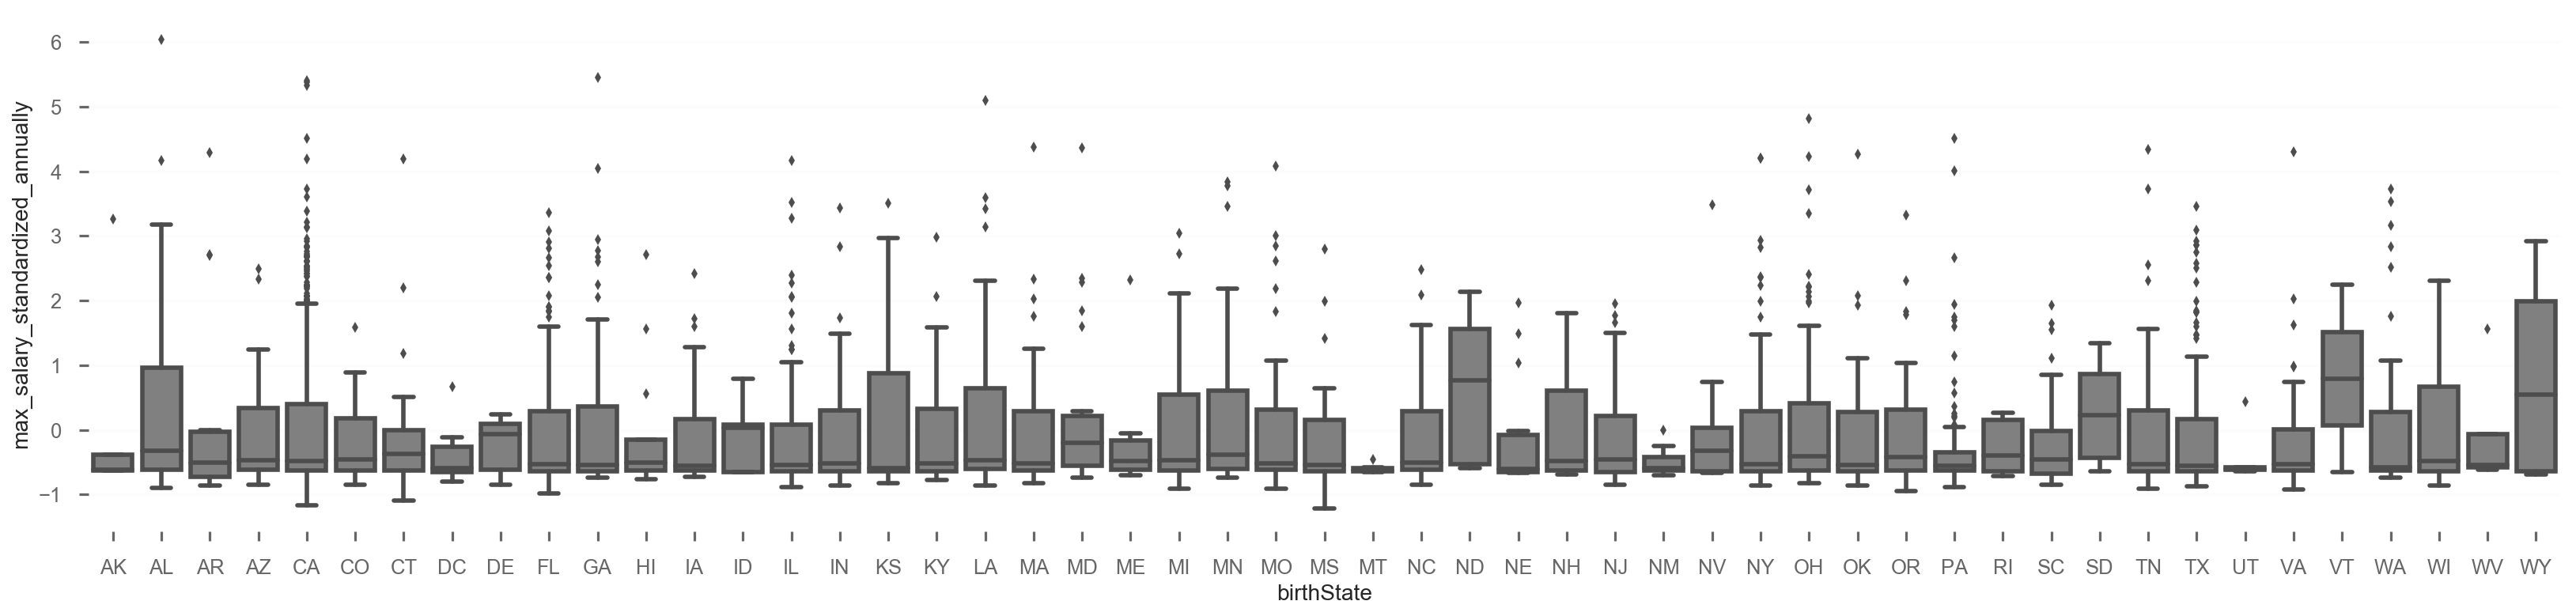

In [172]:
sns.boxplot(x= (df[df['birthCountry'] == 'USA'].sort_values(['birthState'])['birthState']), 
            y=df['max_salary_standardized_annually'].dropna(), data=df, color="grey")
sns.despine(offset=2, trim=True, left=True, bottom=True)

In [96]:
df_2d = df[df['birthCountry'] == 'USA'].groupby(['college_state', 'birthState']).sum().unstack('birthState')
df_2d = df_2d.fillna(0)
df_2d

birthYear                                                  \
birthState           AK        AL       AR       AZ         CA       CO   
college_state                                                             
AL                  0.0  157231.0      0.0      0.0        0.0      0.0   
AR                  0.0       0.0  59992.0      0.0     3923.0   3930.0   
AZ               3952.0    1987.0   1945.0  80592.0   133465.0  11797.0   
CA               3931.0    7802.0   5783.0   9893.0  1761614.0  13709.0   
CO                  0.0       0.0      0.0      0.0     7829.0  27238.0   
CT                  0.0       0.0      0.0      0.0     1987.0      0.0   
DC                  0.0       0.0      0.0      0.0        0.0      0.0   
DE               1979.0       0.0      0.0      0.0        0.0      0.0   
FL                  0.0   17578.0   5804.0      0.0    25588.0   1970.0   
GA                  0.0       0.0      0.0      0.0     5913.0      0.0   
HI                  0.0       0.0      0.0      0.0    13783.0      0.0   
IA                  0.0       0.0      0.0      0.0     1969.0      0.0   
ID                  0.0       0.0      0.0      0.0    13825.0      0.0   
IL                  0.0    1951.0   1930.0   1981.0     7854.0   1893.0   
IN                  0.0    1892.0      0.0      0.0     1976.0      0.0   
KS                  0.0    1935.0   1979.0   1970.0     9821.0   1975.0   
KY                  0.0       0.0      0.0      0.0     1968.0      0.0   
LA                  0.0   11691.0   7717.0      0.0     9903.0   3967.0   
MA                  0.0    1905.0      0.0      0.0     5834.0   1958.0   
MD                  0.0       0.0      0.0      0.0        0.0      0.0   
ME                  0.0       0.0      0.0      0.0     1894.0      0.0   
MI                  0.0    3910.0      0.0      0.0     3754.0      0.0   
MN                  0.0       0.0      0.0      0.0     1923.0      0.0   
MO                  0.0    1972.0   1965.0      0.0     3936.0      0.0   
MS                  0.0   17669.0   5887.0      0.0        0.0      0.0   
NAN                 0.0       0.0      0.0      0.0        0.0      0.0   
NC                  0.0    1987.0      0.0   1977.0     3955.0      0.0   
ND                  0.0       0.0      0.0      0.0        0.0      0.0   
NE                  0.0    1955.0      0.0      0.0     7882.0      0.0   
NH                  0.0       0.0      0.0      0.0        0.0   1881.0   
NJ                  0.0       0.0      0.0      0.0     3924.0      0.0   
NM                  0.0       0.0      0.0   1982.0     3954.0      0.0   
NV                  0.0       0.0      0.0      0.0    27620.0      0.0   
NY                  0.0    1924.0      0.0      0.0        0.0      0.0   
OH                  0.0       0.0      0.0      0.0     3963.0      0.0   
OK               1956.0       0.0   3937.0      0.0    43283.0   1969.0   
OR                  0.0    3884.0   1953.0      0.0    15742.0      0.0   
PA                  0.0       0.0      0.0      0.0        0.0      0.0   
RI                  0.0       0.0      0.0      0.0        0.0      0.0   
SC                  0.0    1961.0      0.0      0.0     3965.0      0.0   
SD                  0.0       0.0      0.0      0.0        0.0      0.0   
TN                  0.0    3827.0   3942.0      0.0     9830.0   3967.0   
TX                  0.0    3929.0  21305.0   1965.0    23605.0   1981.0   
UT                  0.0       0.0      0.0   1970.0    19636.0      0.0   
VA                  0.0       0.0      0.0      0.0     1961.0      0.0   
VT                  0.0       0.0      0.0      0.0        0.0      0.0   
WA               1986.0       0.0      0.0      0.0     9788.0   1992.0   
WI                  0.0       0.0      0.0   1973.0        0.0      0.0   
WV                  0.0       0.0      0.0      0.0     1988.0      0.0   
WY                  0.0       0.0      0.0   1964.0        0.0      0.0   

                                      

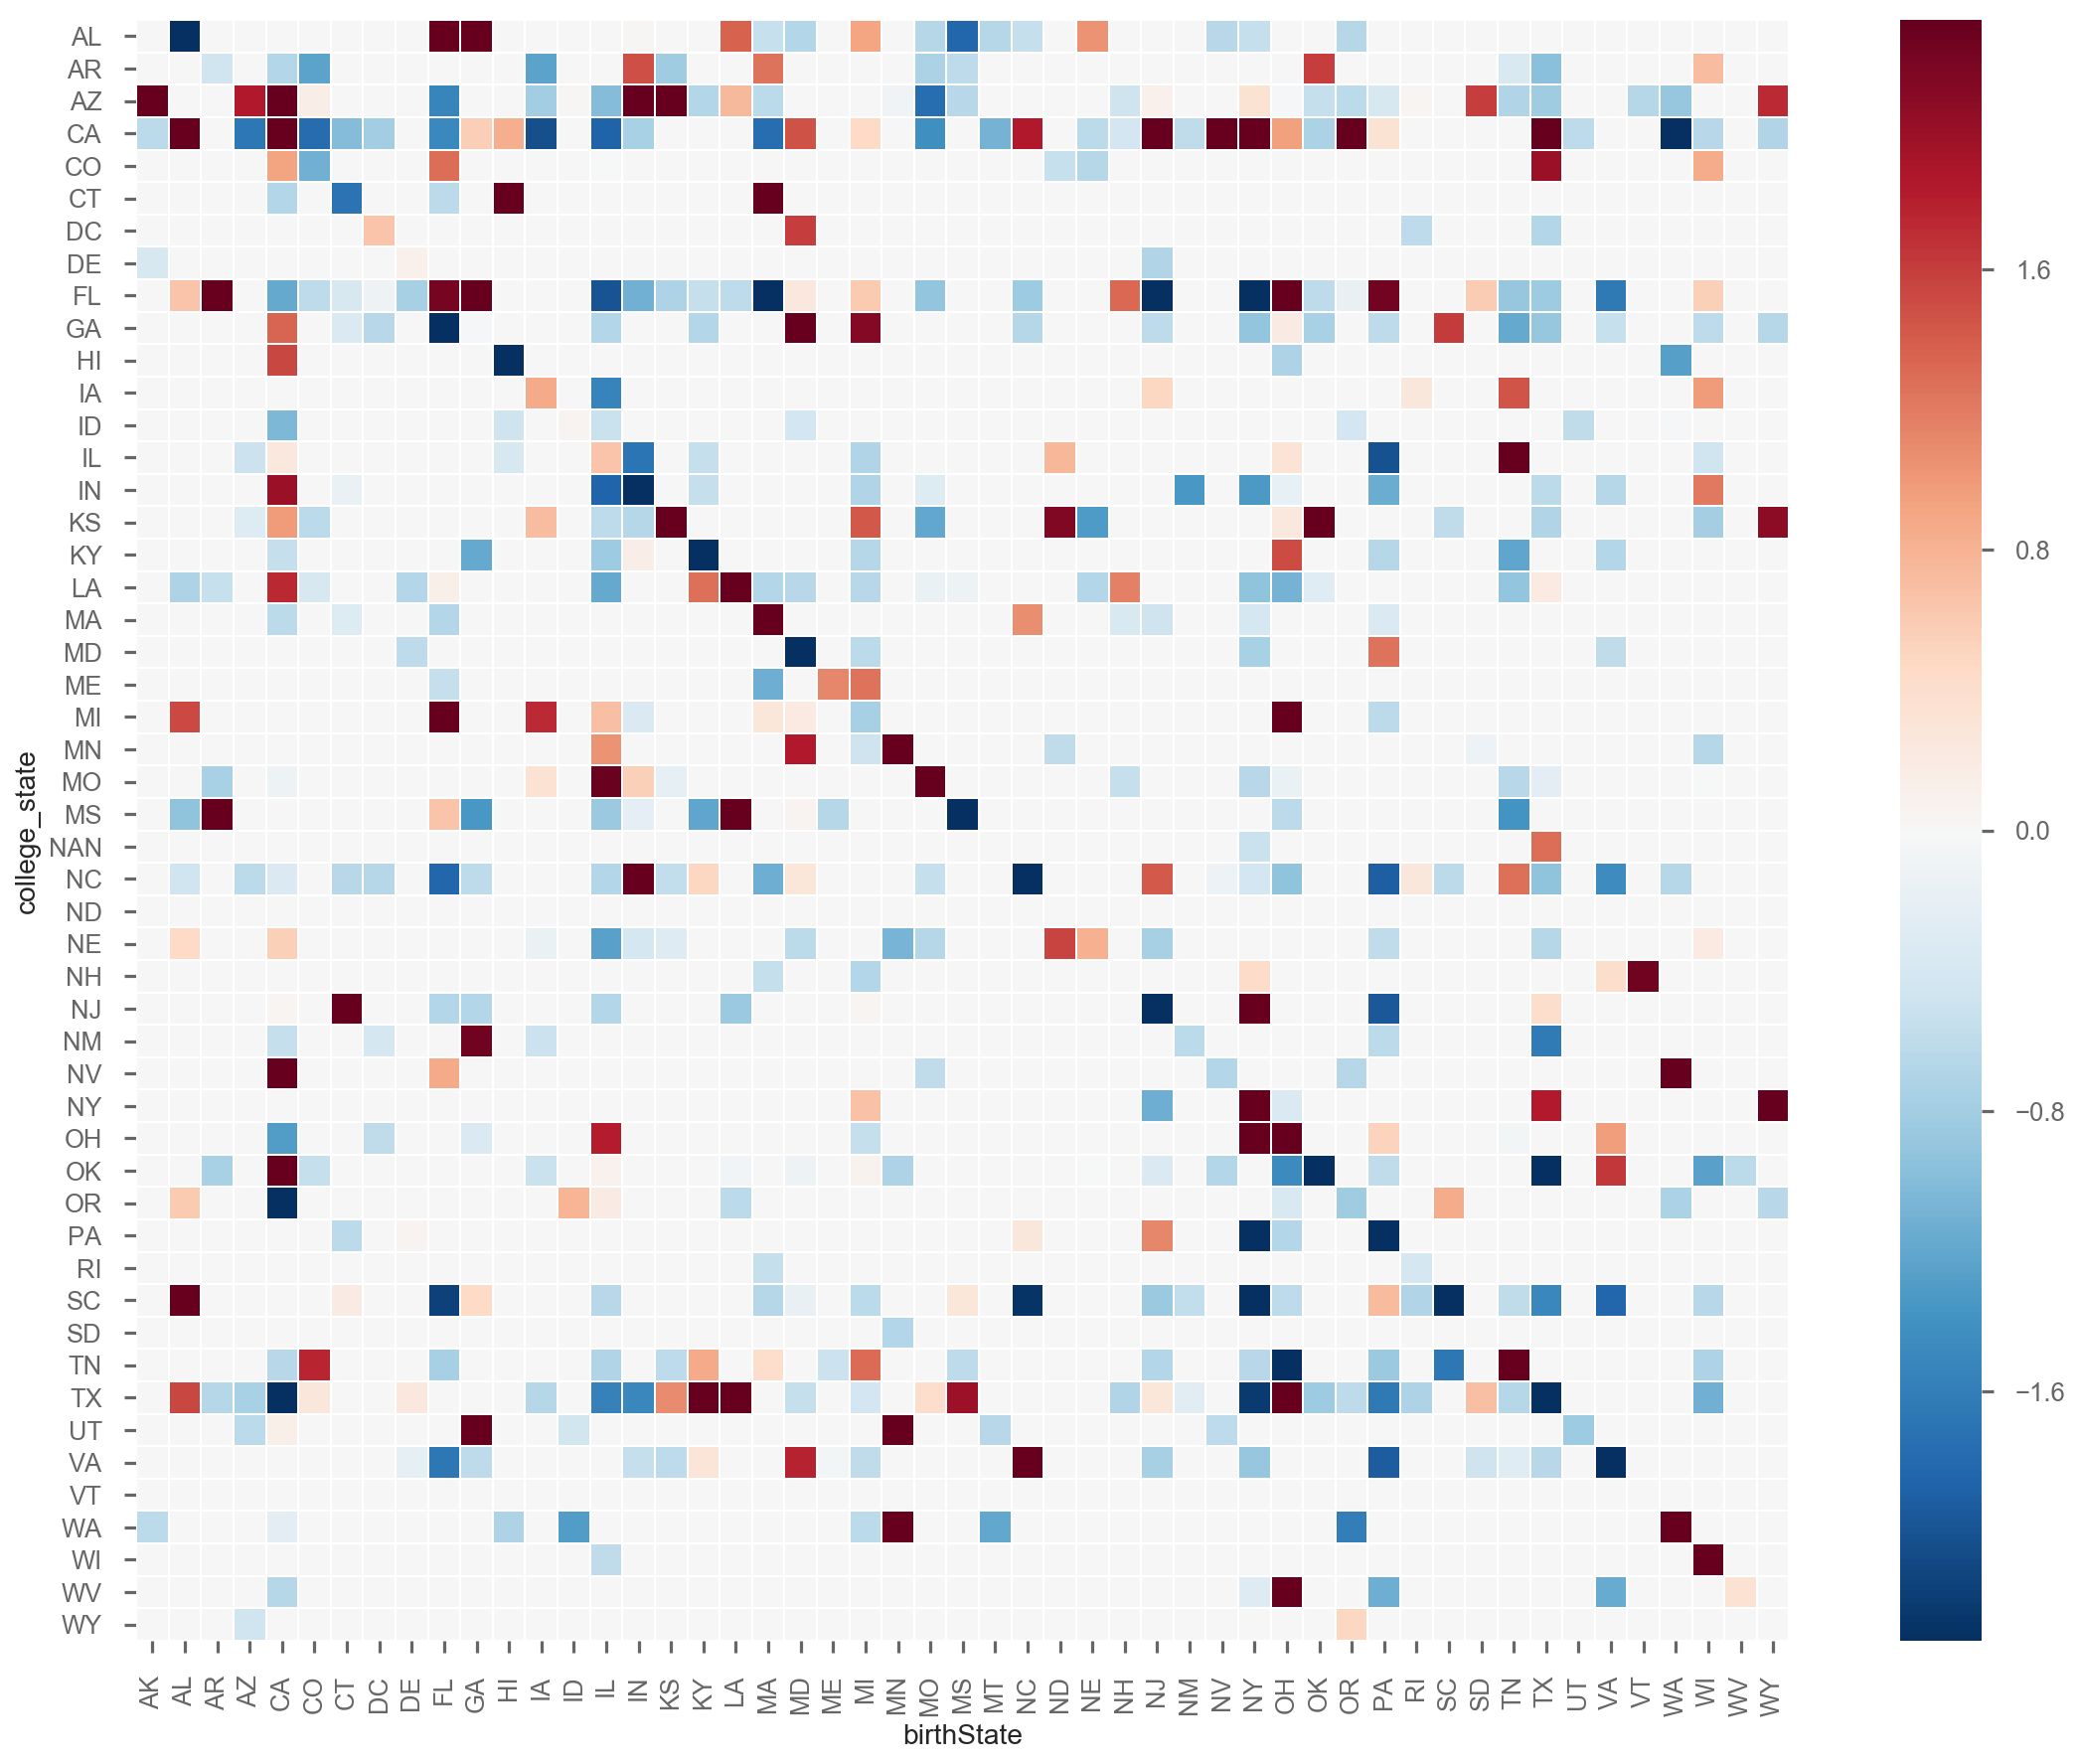

In [125]:
plt.figure(figsize=(20,15))
fig = sns.heatmap(df_2d['max_salary_standardized_annually'], center=0, linewidths=.5, square=True, robust=True)

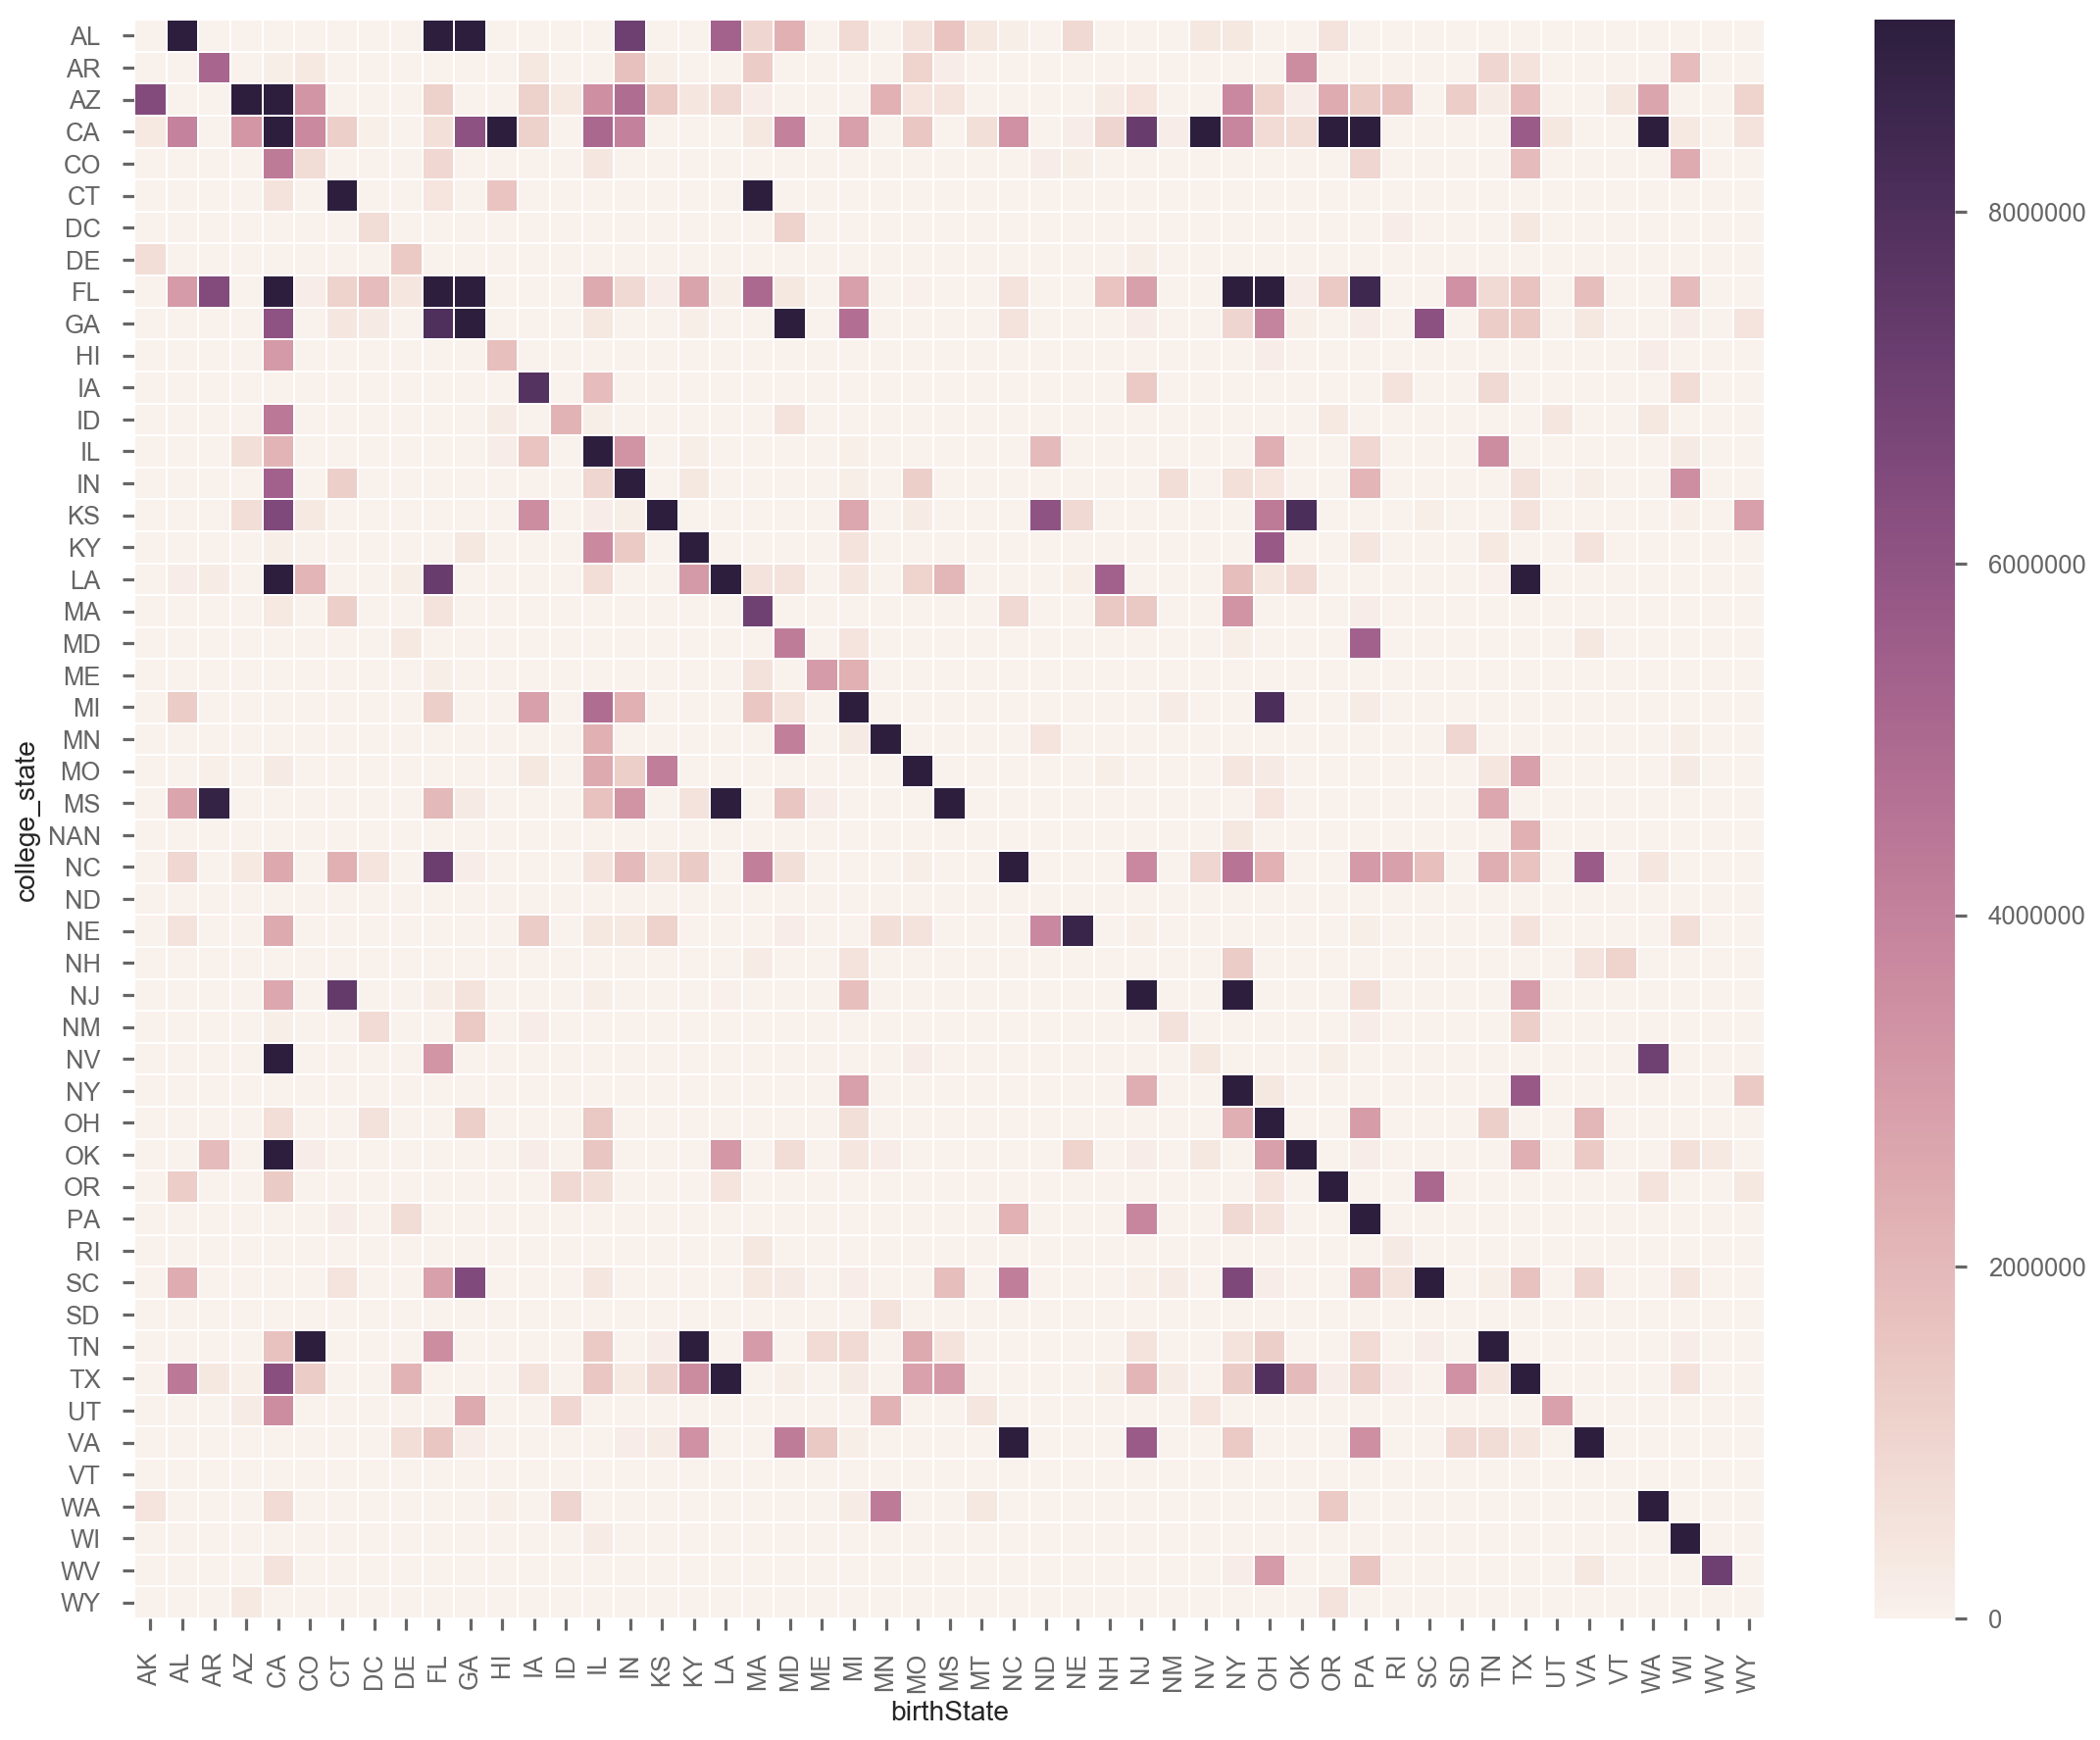

In [156]:
plt.figure(figsize=(20,15))
sns.heatmap(df_2d['mean_salary'], linewidths=.5, square=True, robust=True)

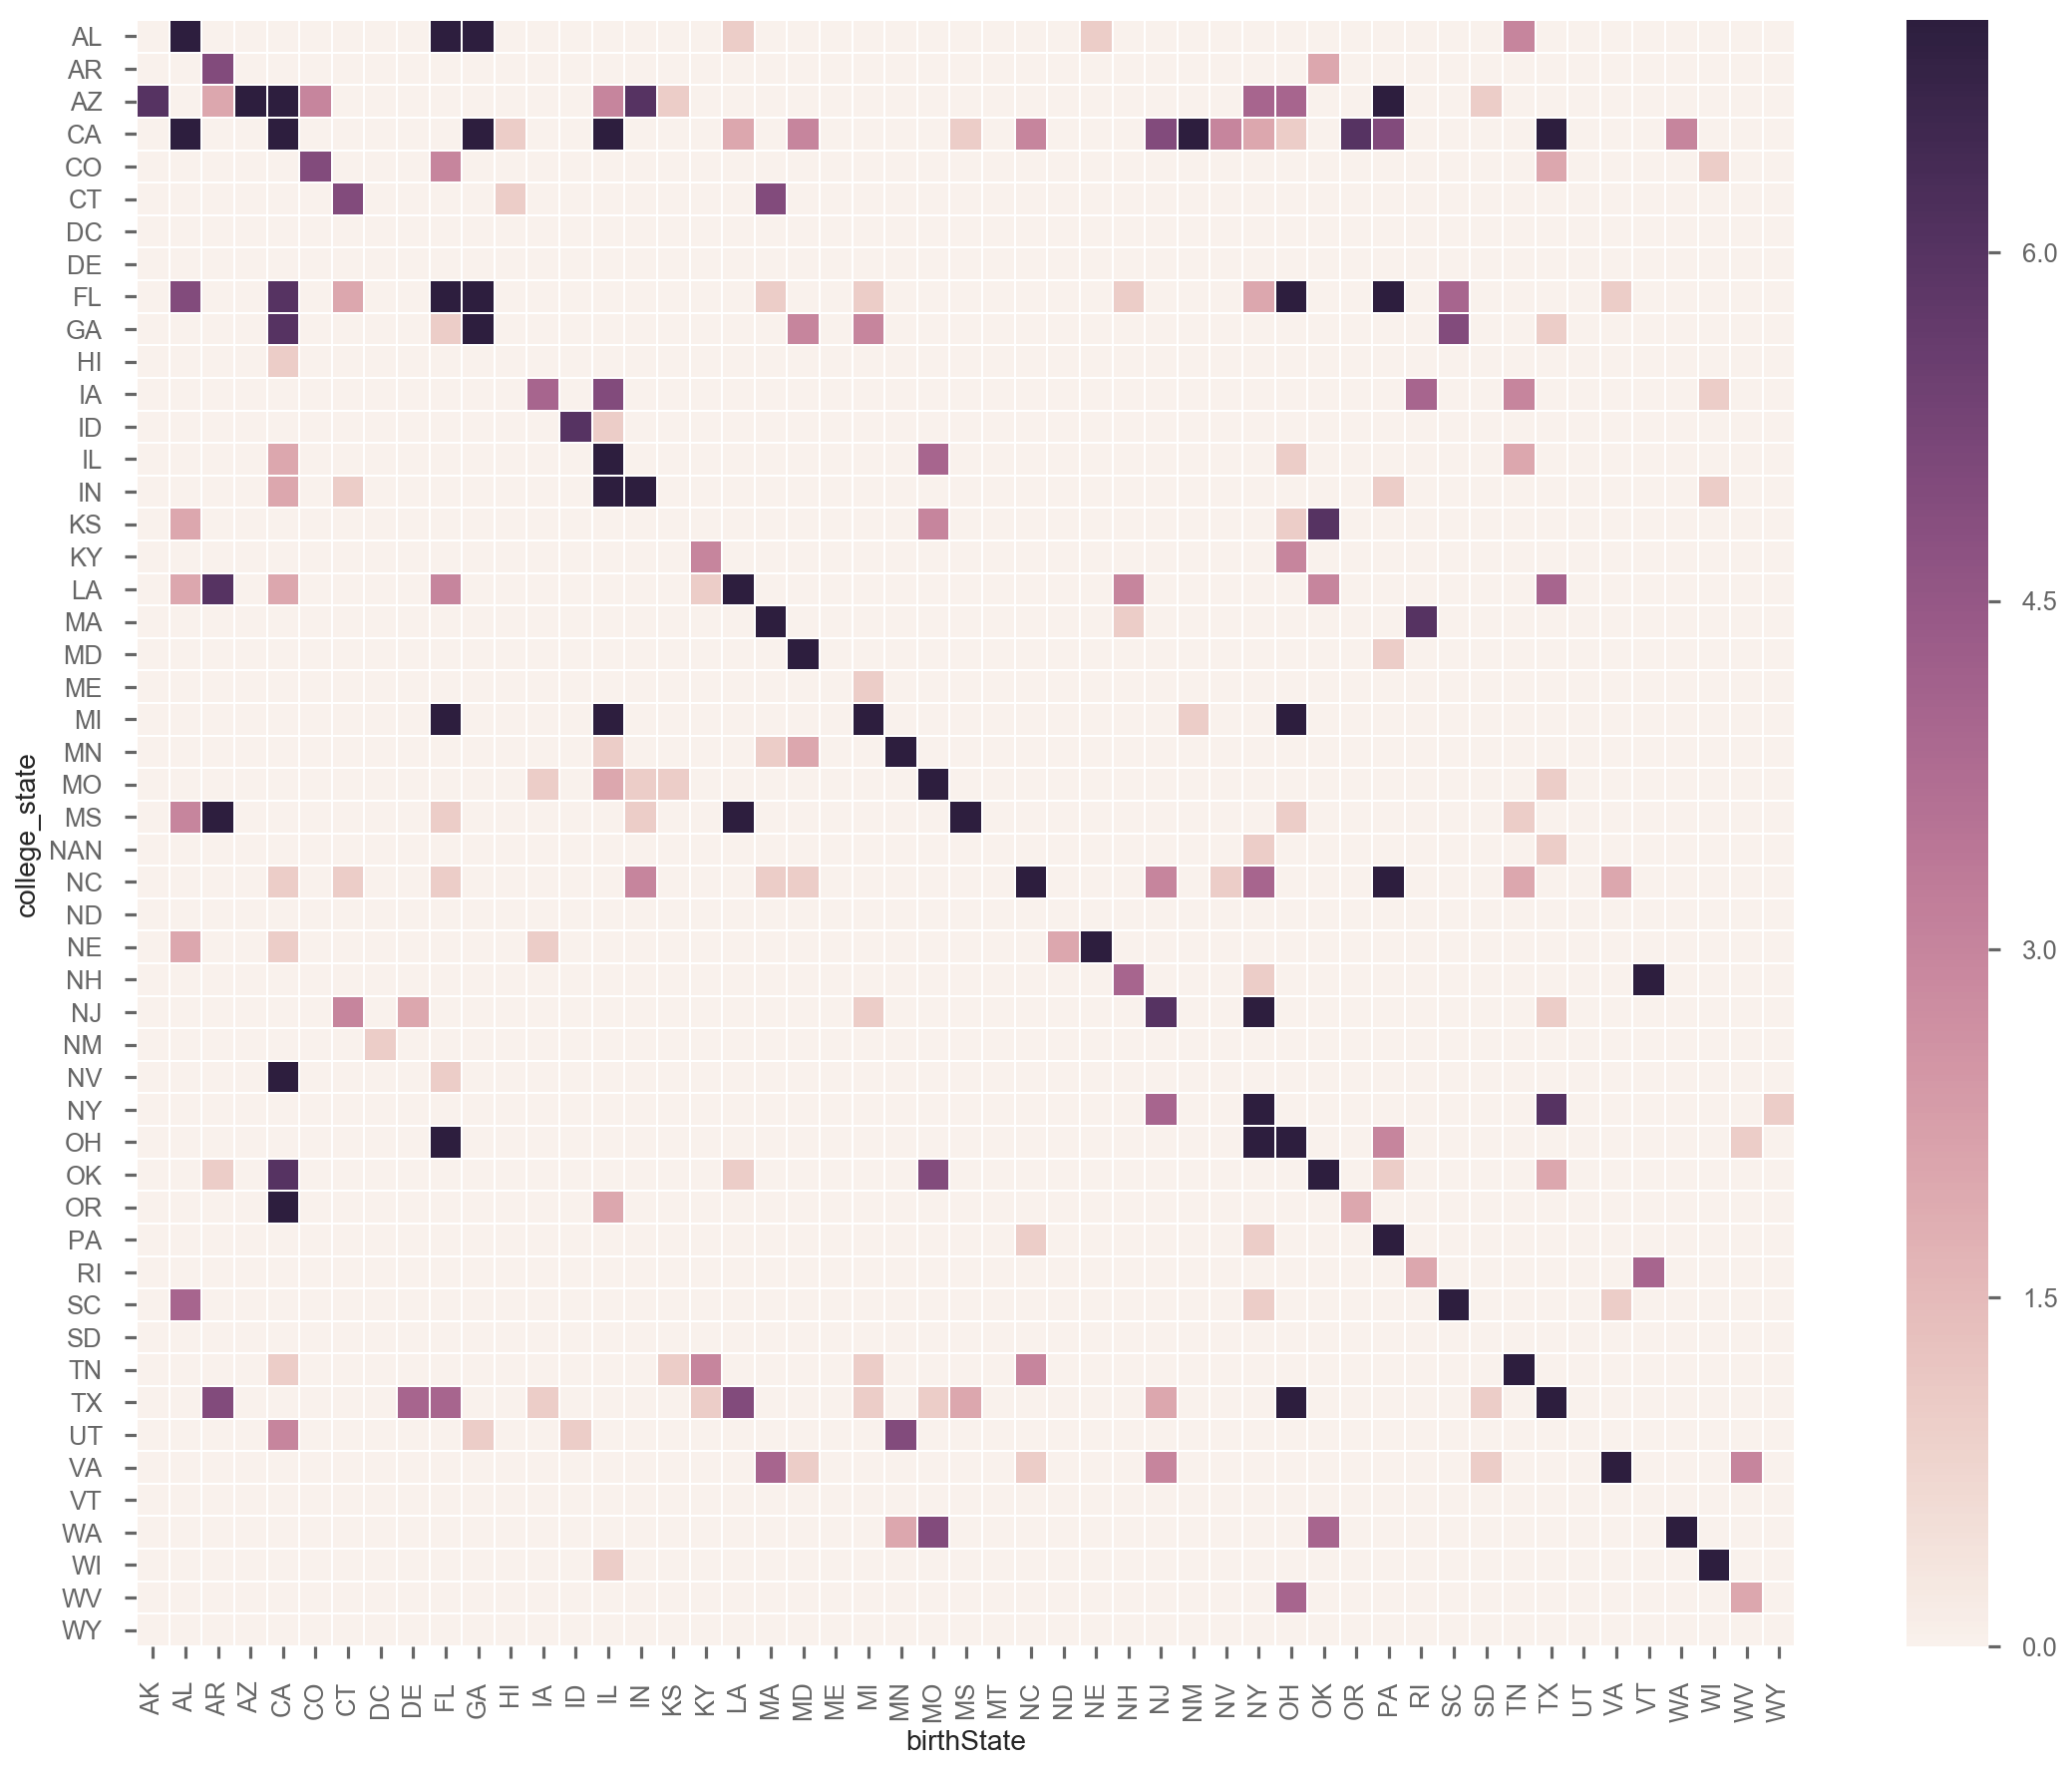

In [128]:
plt.figure(figsize=(20,15))
sns.heatmap(df_2d['allstar_count'], linewidths=.5, square=True, robust=True)

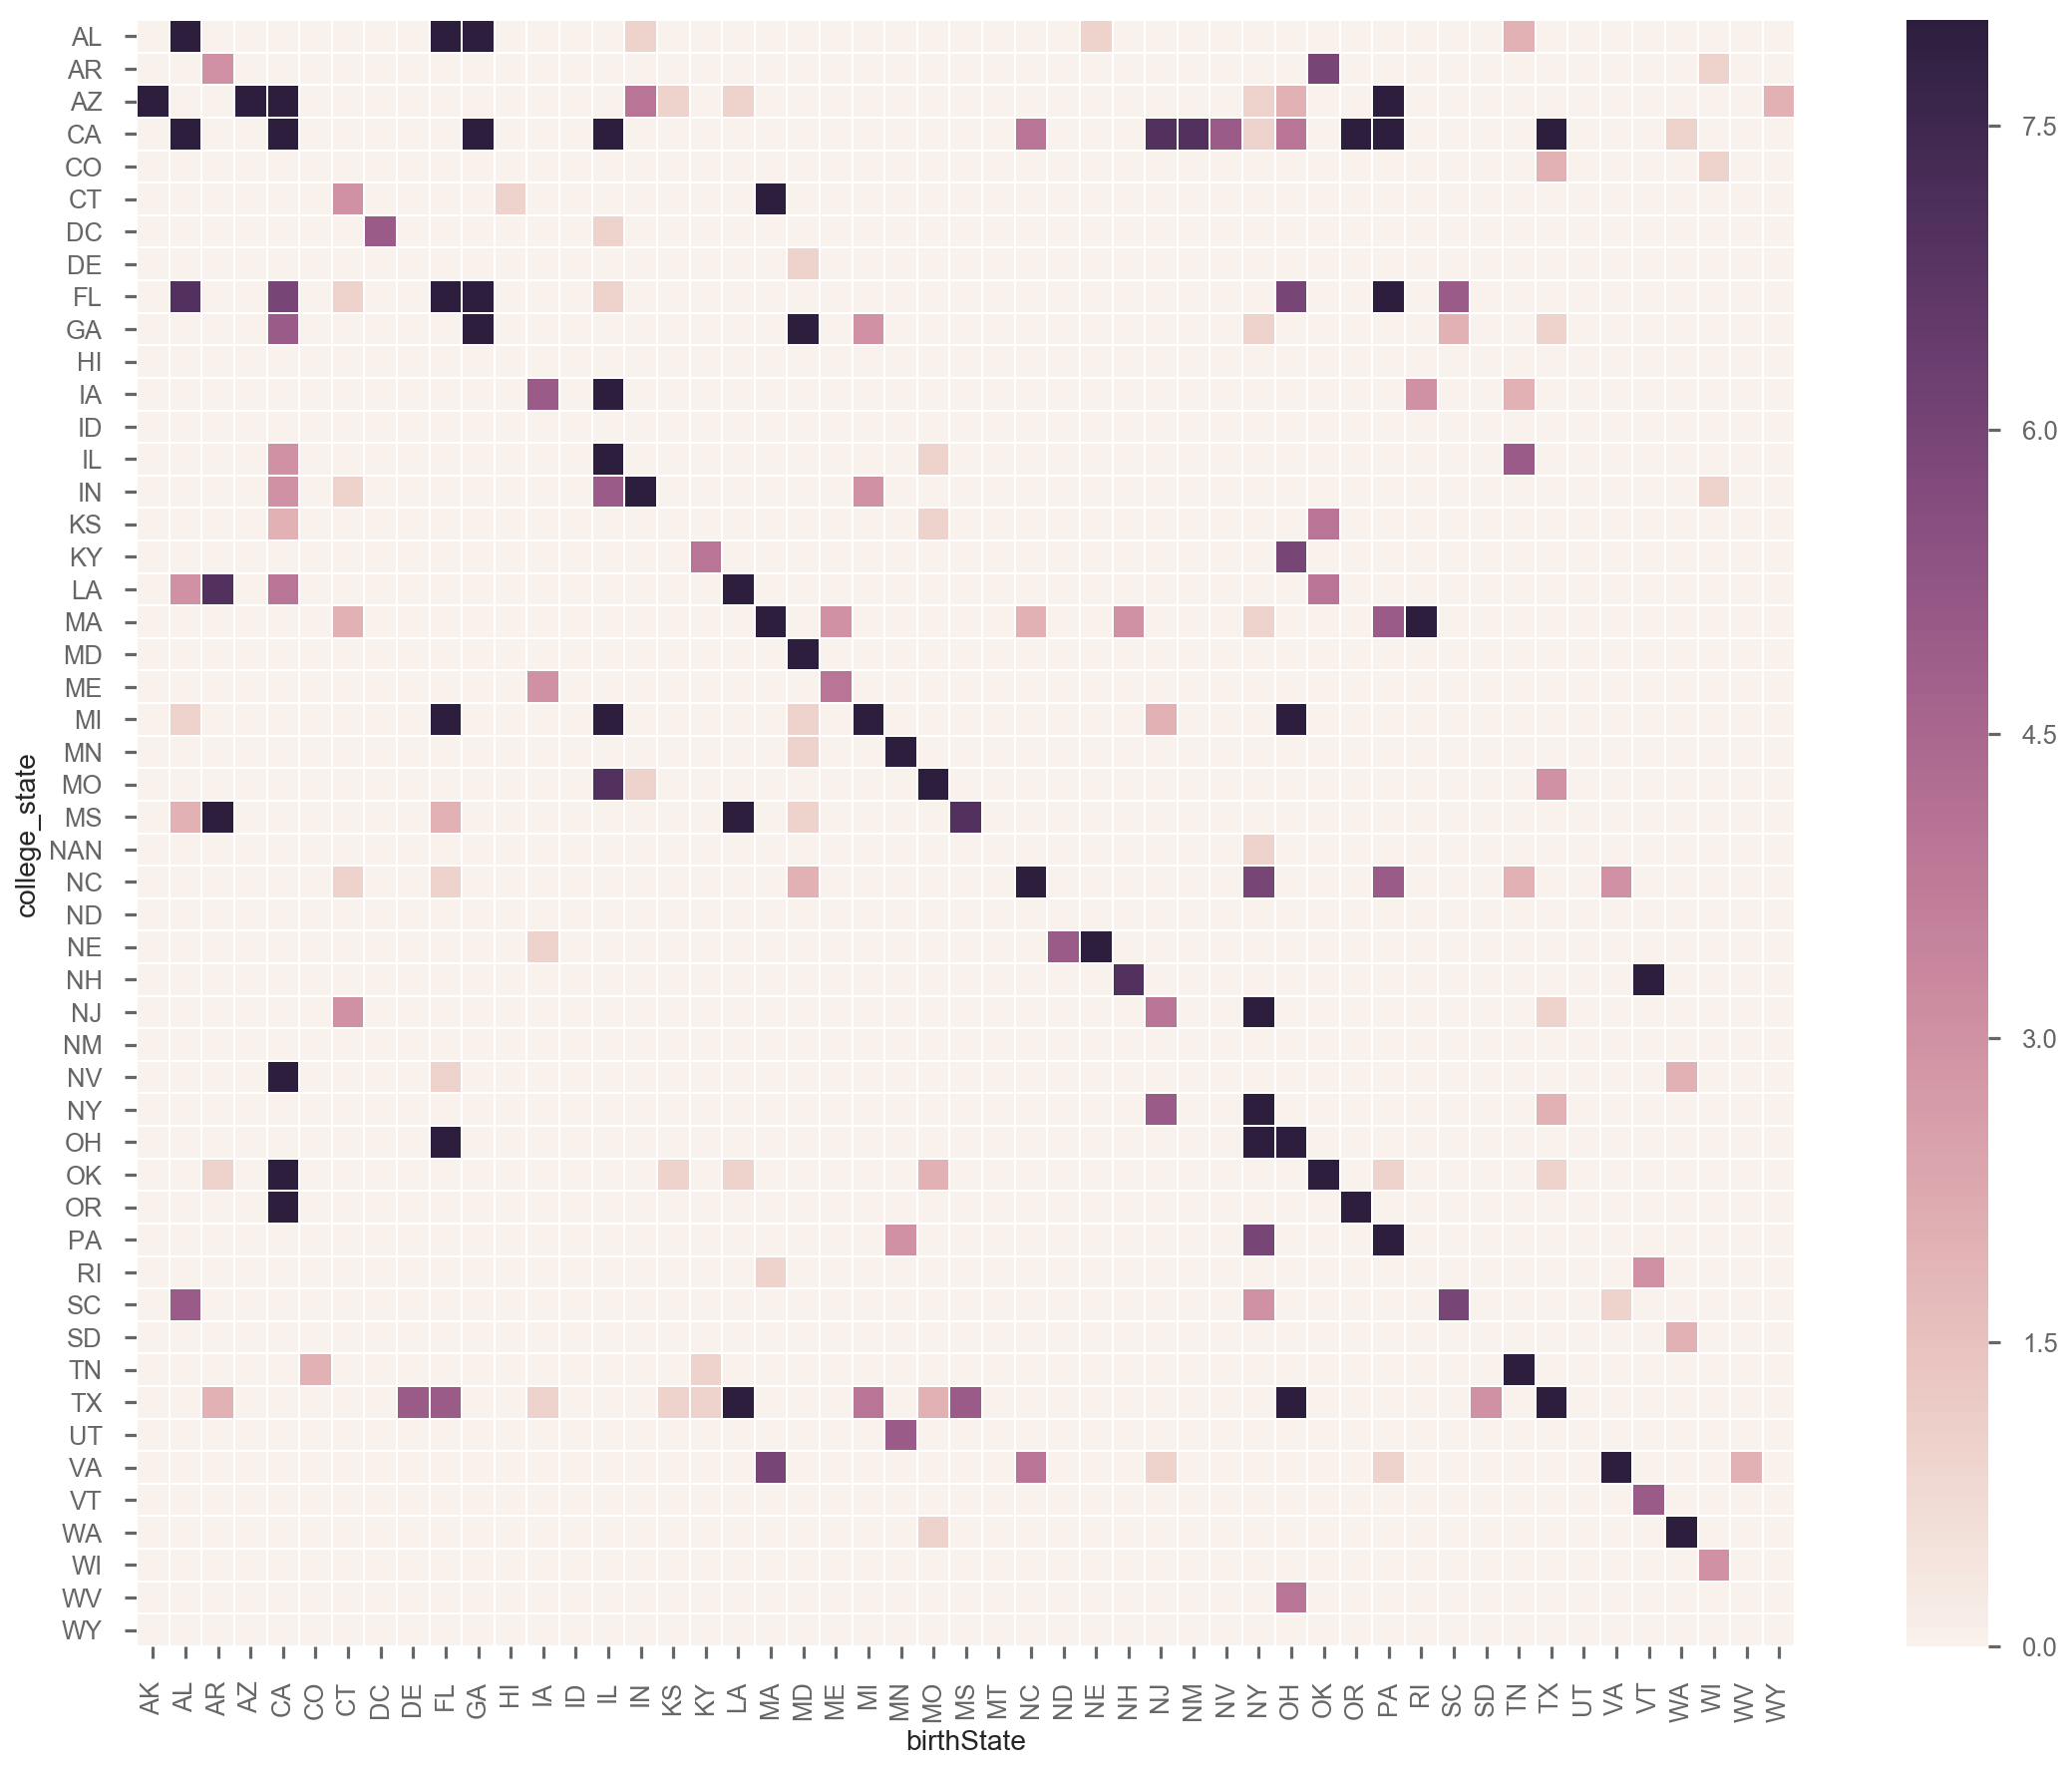

In [129]:
plt.figure(figsize=(20,15))
sns.heatmap(df_2d['award_count'], linewidths=.5, square=True, robust=True)

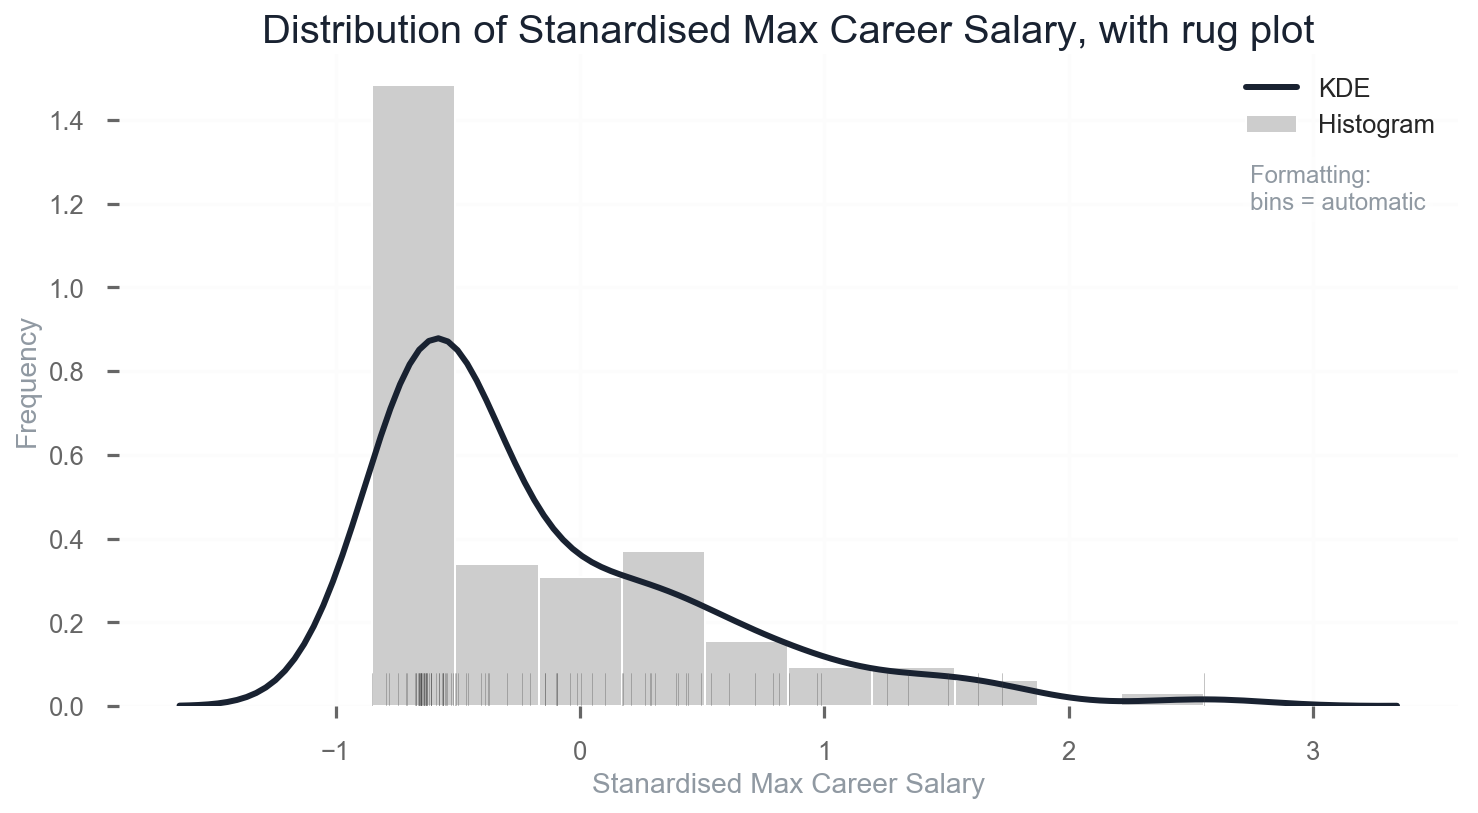

In [174]:
fig_3 = figures.univariate(df[                             
                    df['college_state'] == 'NC' 
                   ]['max_salary_standardized_annually'].dropna(), 'Stanardised Max Career Salary', bin_n=None)

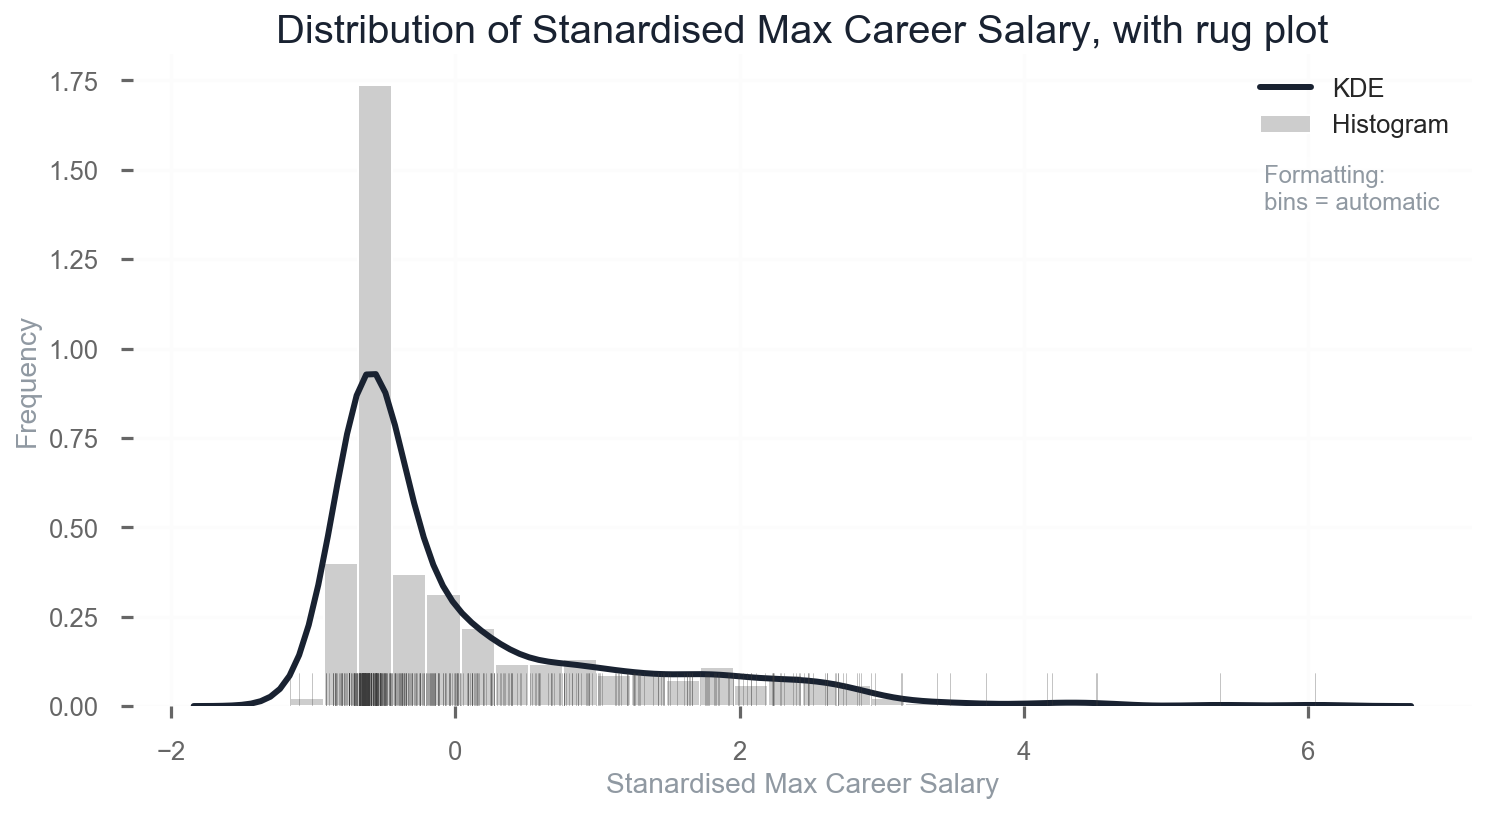

In [175]:
fig_3 = figures.univariate(df[                             
                    df['college_state'] == 'CA' 
                   ]['max_salary_standardized_annually'].dropna(), 'Stanardised Max Career Salary', bin_n=None)